# 3. Explorative Data Analyses

Most important findings on the course dataset:
- there are courses with no reviews/ratings, but most of them are between rating 4 and 4.5
- The price ranges between 0 and 199 EUR
- There are some really popular courses with a lot of subscribers. The top 3 are:
        - machinelearning	with more than 300T subscribers
        - python-for-data-science-and-machine-learning-bootcamp with 192T subscribers
        - an-entire-mba-in-1-courseaward-winning-business-school-prof with 187T subscribers
- The number of lectures mostly vary between 13 and 37 (IQR)
- The average age of a course is 26 months (since it was published). There are more recently published courses than older ones.
- The majority of the courses is for all levels. Only a few courses requires an advanced level.
- The courses are divided into 16 subcategories, whereas the two most significant are Finance and Entrepreneurship. 
        - Two subcategories have an average price higher than 100 dollars : The subcategory Data & analytics with 112, and Project Management with 104
        - The total earning on the courses is the highest in the subcategory for Data & Analytics and the second is in Entrepreneurship.
        - The total number of subscribers are the highest in the category of Entrepreneurship (1.) and in Data & Analytics (2.)
        - There is not much difference between the average ratings of the courses in each subcategory. The highest average ratings are in the subcategories Media and Communications. 
- I investigated the top words in each subcategories in the attributes objectives and description separately. E.g. in the subcategory Data& Analytics, the top 5 words are:
    - data, use, model, understand, create

After the univariate analysis I also executed multivariate analysis:
- There is a positive correlation between the number of reviews/number of subscribers and the average rating - students normally give good ratings for courses they liked
- As expected, there is a positive correlation between number of subscribers and number of reviews
- There is also a positive correlation between published since and the average rating -> older courses have better ratings. This seems logic, since I would expect that courses which aren't popular won't stay long


Most important findings on the reviews dataset: 
- The users are unfortunately not unique. Because if this reason, it is not possible to build a recommender system on the user ratings. 
- - Most users (more than 600.000) gave only one review, but there are couple user_names, who have plenty of reviews: the most common username is David with more than 400 reviews.
- Most courses have very few reviews



In [1]:
import pandas as pd
import numpy as np
import ast
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import udemy_functions
#for the text attributes
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from operator import itemgetter
from nltk.stem import SnowballStemmer

## 3.1. EDA of the course dataset

In [2]:
df_courses=pd.read_csv('data/cleaned/df_courses.csv', index_col=0, sep=' ', converters={"objectives": ast.literal_eval})
df_courses.tail()

avg_rating  avg_rating_recent  \
9995     4.07692            4.27817   
9996     3.70000            3.72982   
9997     4.25000            4.47192   
9998     4.47436            4.39927   
9999     3.70000            3.70031   

                                       description_text  has_certificate  \
9995  At this point you might be asking yourself, ho...             True   
9996  This course is meant for beginners and it atte...             True   
9997  Have you ever tried to raise money for your bu...             True   
9998  Follow Step-By-Step with my On Screen videos s...             True   
9999  Great course for someone who is new to the mar...             True   

      is_paid       id instructional_level  is_enrollable_on_mobile  \
9995    False  1150378      Beginner Level                     True   
9996    False  1670482      Beginner Level                     True   
9997    False    46018          All Levels                     True   
9998    False  1816118      Beginner Level                     True   
9999    False   948772      Beginner Level                     True   

      is_owned_by_instructor_team  is_practice_test_course  \
9995                        False                    False   
9996                        False                    False   
9997                        False                    False   
9998                        False                    False   
9999                        False                    False   

             ...                                            published_title  \
9995         ...          make-passive-income-start-shopify-aliexpress-d...   
9996         ...          practical-oriented-analysis-of-financial-state...   
9997         ...                               building-a-fund-raising-team   
9998         ...          how-to-start-shopify-dropshipping-accelerator-...   
9999         ...             stock-market-proven-profit-strategy-for-novice   

      relevancy_score  rating_1  rating_2  rating_3  rating_4  rating_5  \
9995        100.00737     0.054     0.095     0.203     0.216     0.432   
9996        100.00727     0.041     0.068     0.151     0.397     0.342   
9997        100.00727     0.041     0.041     0.178     0.301     0.438   
9998        100.00727     0.014     0.014     0.055     0.521     0.397   
9999        100.00727     0.041     0.055     0.301     0.342     0.260   

     published_since_month  primary_category primary_subcategory  
9995                    14          Business    Entrepreneurship  
9996                     8          Business             Finance  
9997                    71          Business    Entrepreneurship  
9998                     7          Business    Entrepreneurship  
9999                    30          Business    Entrepreneurship  

[5 rows x 29 columns]

### 3.1.3. Numerical columns

In [3]:
df_courses.describe()

avg_rating  avg_rating_recent            id  num_article_assets  \
count  8834.000000        8834.000000  8.834000e+03         8834.000000   
mean      3.700445           3.710128  1.090680e+06            1.929137   
std       1.361854           1.366500  5.994949e+05            5.475196   
min       0.000000           0.000000  2.762000e+03            0.000000   
25%       3.700000           3.715465  5.718895e+05            0.000000   
50%       4.150000           4.165710  1.128558e+06            0.000000   
75%       4.450000           4.447360  1.570806e+06            2.000000   
max       5.000000           5.000000  2.230450e+06          147.000000   

       num_curriculum_items  num_lectures  num_practice_tests  num_quizzes  \
count           8834.000000   8834.000000         8834.000000  8834.000000   
mean              34.483020     32.666063            0.088182     1.636405   
std               42.150362     40.694749            0.550239     4.421602   
min                1.000000      0.000000            0.000000     0.000000   
25%               14.000000     13.000000            0.000000     0.000000   
50%               24.000000     22.000000            0.000000     0.000000   
75%               40.000000     37.000000            0.000000     2.000000   
max              550.000000    550.000000            6.000000   108.000000   

       num_subscribers   num_reviews        price  relevancy_score  \
count      8834.000000   8834.000000  8834.000000      8834.000000   
mean       2621.250057    179.394272    89.363840       109.617954   
std        8460.951665   1243.906271    69.943478         1.942014   
min           0.000000      0.000000     0.000000       100.007270   
25%          64.000000      4.000000    24.990000       110.000300   
50%         681.000000     19.000000    59.990000       110.001600   
75%        2181.250000     76.000000   149.990000       110.005880   
max      380584.000000  73048.000000   199.990000       110.999330   

          rating_1     rating_2     rating_3     rating_4     rating_5  \
count  8834.000000  8834.000000  8834.000000  8834.000000  8834.000000   
mean      0.037299     0.044389     0.132011     0.254540     0.427377   
std       0.090719     0.092126     0.146572     0.191154     0.255041   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.125000     0.286000   
50%       0.000000     0.017000     0.111000     0.265000     0.458000   
75%       0.038000     0.055000     0.182000     0.357000     0.587000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       published_since_month  
count            8834.000000  
mean               26.965248  
std                19.121006  
min                 0.000000  
25%                11.000000  
50%                22.000000  
75%                42.000000  
max               108.000000

There are around 900 courses with no reviews/ratings, but most of the ratings are between rating 4 and 4.5.

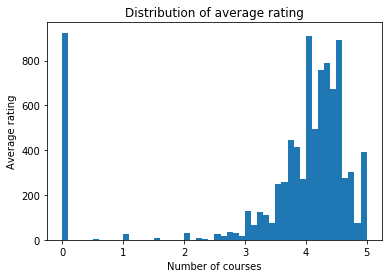

In [4]:
plt.hist(df_courses['avg_rating'], bins=50)
plt.xlabel('Number of courses')
plt.ylabel('Average rating')
plt.title('Distribution of average rating')
plt.savefig('images/avg_rating.png')

The price ranges between 0 and 199 EUR. Most courses cost eiter 19.99 or 199.99 $.

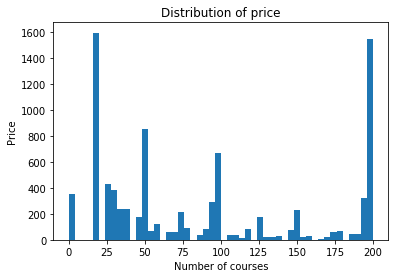

In [5]:
plt.hist(df_courses['price'], bins=50)
plt.xlabel('Number of courses')
plt.ylabel('Price')
plt.title('Distribution of price')
plt.savefig('images/price.png')

I checked which courses are most visited. The most popular course is Machinelearning with more than 300.000 subscribers. Courses with the top 10 most subscribers can be seen below:

In [6]:
#most popular courses
top10_courses= df_courses.sort_values('num_subscribers', ascending=False)[['published_title', 'num_subscribers']].head(10)
for i, row in top10_courses.iterrows():
    print('The course {} has {} subscribers.'.format(row['published_title'],row['num_subscribers']))

The course machinelearning has 380584 subscribers.
The course python-for-data-science-and-machine-learning-bootcamp has 192581 subscribers.
The course an-entire-mba-in-1-courseaward-winning-business-school-prof has 187207 subscribers.
The course how-to-build-an-online-business-a-complete-business-plan has 156204 subscribers.
The course deeplearning has 148980 subscribers.
The course deep-learning-prerequisites-the-numpy-stack-in-python has 137417 subscribers.
The course the-complete-sql-bootcamp has 133919 subscribers.
The course project-management has 123777 subscribers.
The course the-beginners-guide-to-the-stock-market has 123758 subscribers.
The course secret-sauce-of-great-writing has 107282 subscribers.


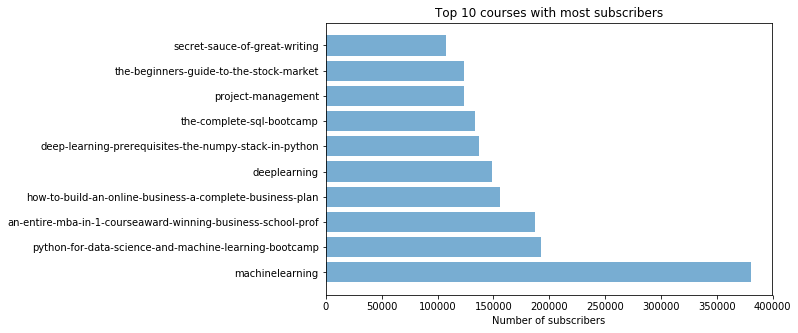

In [7]:
fig, ax= plt.subplots(figsize=(8,5))
ax.barh(np.arange(len(top10_courses)), top10_courses['num_subscribers'], alpha=0.6)
plt.yticks(np.arange(len(top10_courses)), top10_courses['published_title'])
plt.title('Top 10 courses with most subscribers')
ax.set_xlabel('Number of subscribers')
plt.savefig('images/top10courses.png')

I plotted a histogram and a boxplot from each numerical attribute. Some of the features has outliers, and the distribution is skewed.

Number of 0 values of attribute avg_rating is 924.
Number of 0 values of attribute avg_rating_recent is 924.
Number of 0 values of attribute num_article_assets is 5227.
Number of 0 values of attribute num_curriculum_items is 0.
Number of 0 values of attribute num_lectures is 161.
Number of 0 values of attribute num_practice_tests is 8515.
Number of 0 values of attribute num_quizzes is 5828.
Number of 0 values of attribute num_subscribers is 218.
Number of 0 values of attribute num_reviews is 924.
Number of 0 values of attribute price is 350.
Number of 0 values of attribute relevancy_score is 0.
Number of 0 values of attribute published_since_month is 47.
Number of 0 values of attribute rating_1 is 4443.
Number of 0 values of attribute rating_2 is 3932.
Number of 0 values of attribute rating_3 is 2421.
Number of 0 values of attribute rating_4 is 1851.
Number of 0 values of attribute rating_5 is 1434.


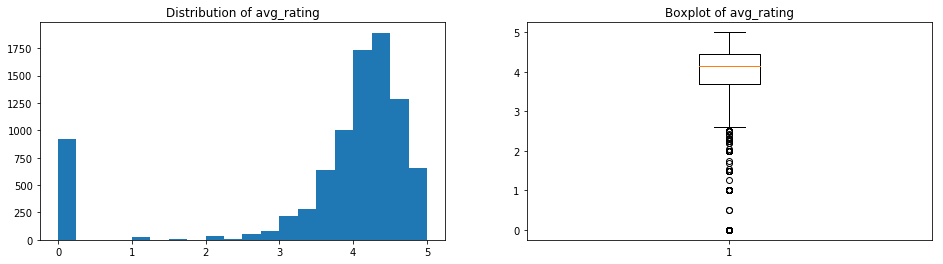

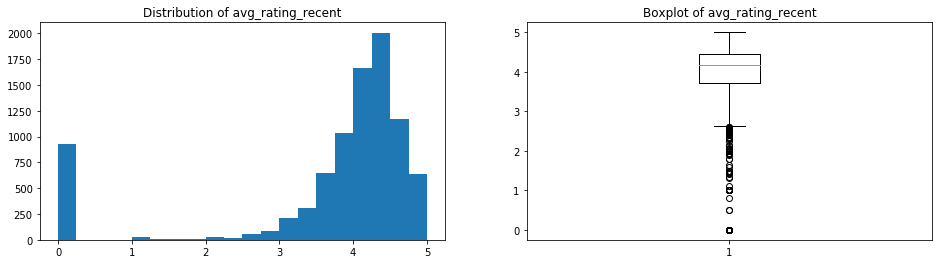

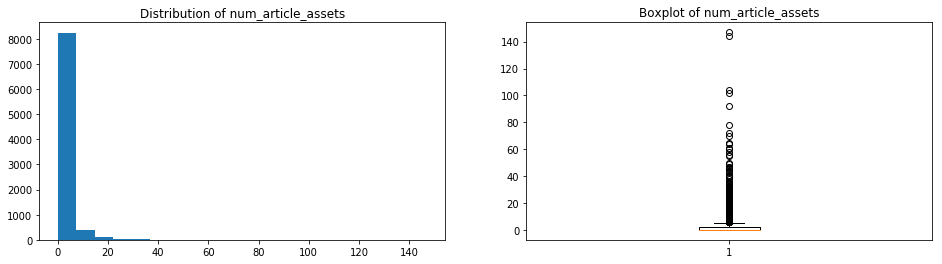

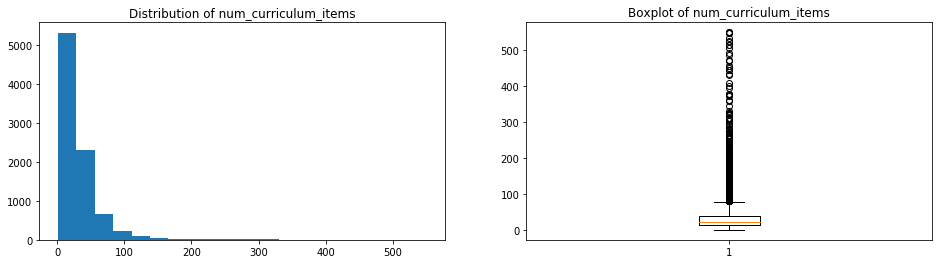

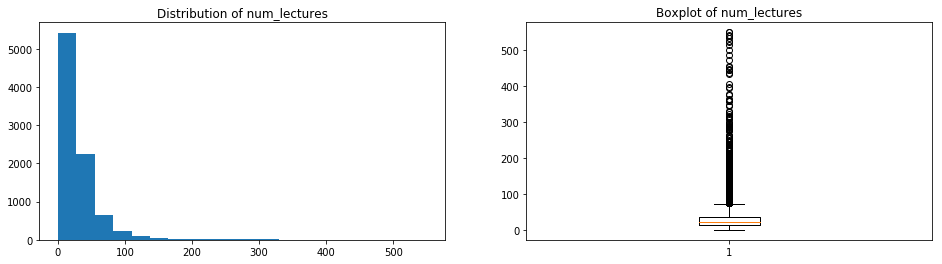

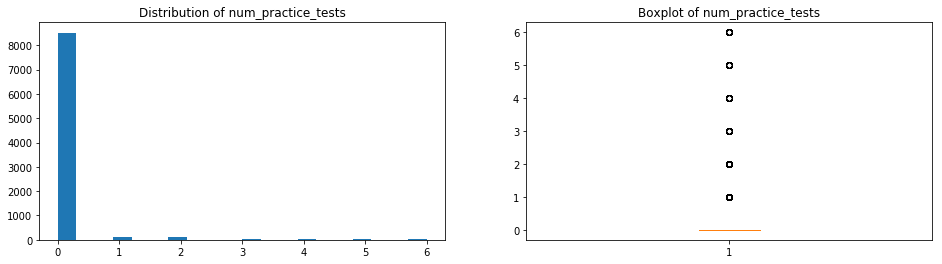

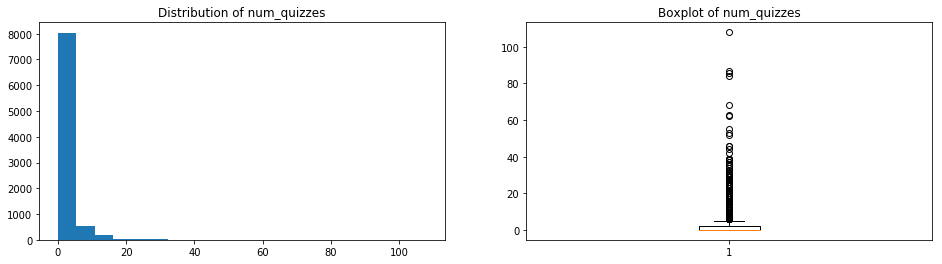

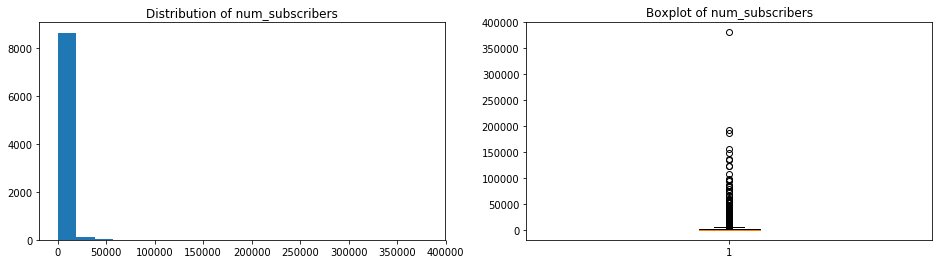

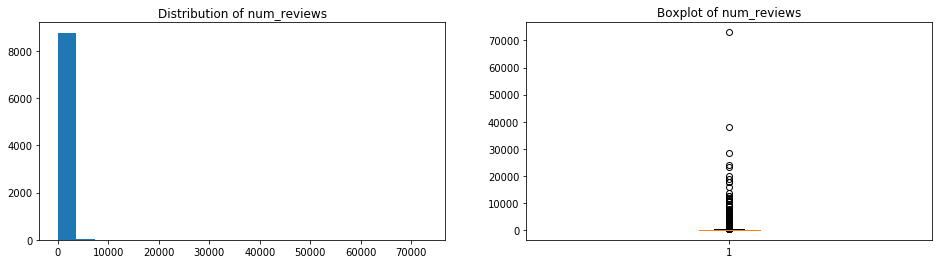

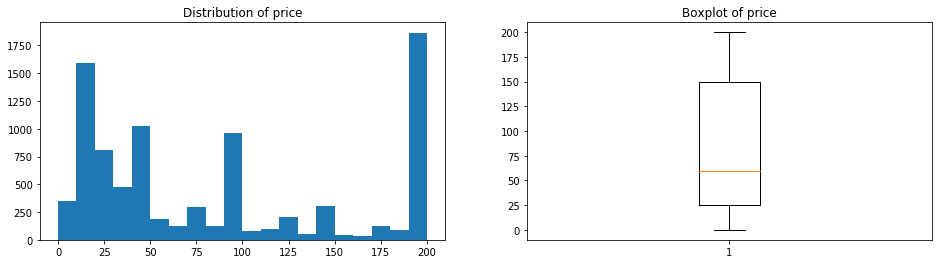

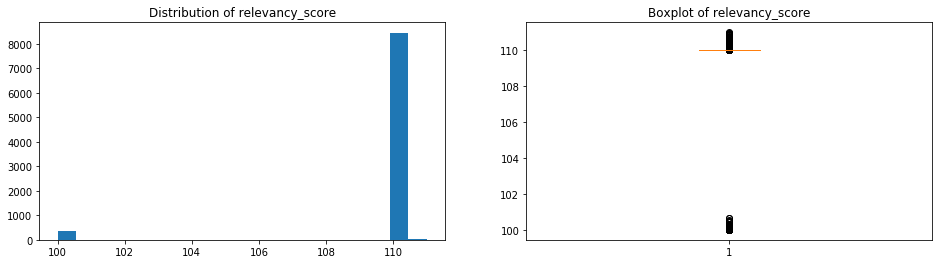

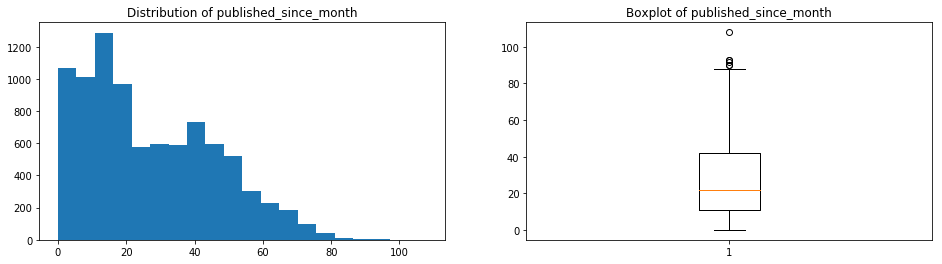

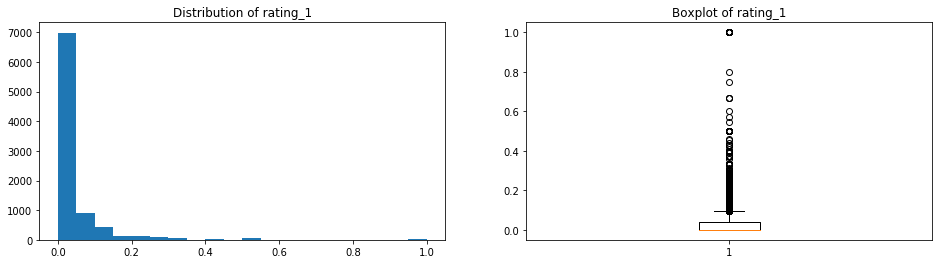

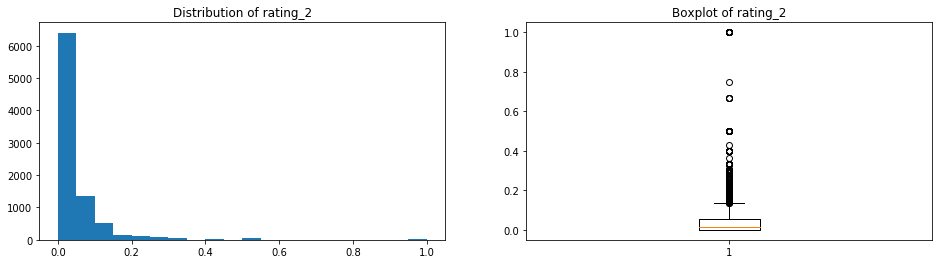

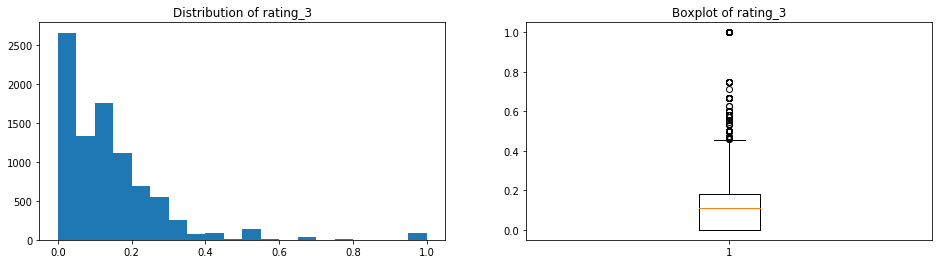

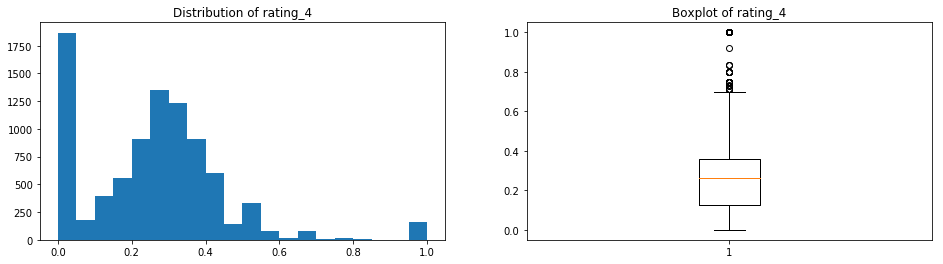

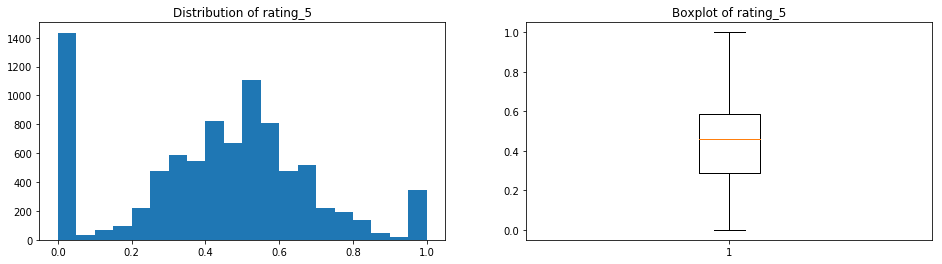

In [8]:
var_num=['avg_rating', 'avg_rating_recent','num_article_assets' , 'num_curriculum_items',
         'num_lectures', 'num_practice_tests', 'num_quizzes','num_subscribers', 'num_reviews', 'price', 
         'relevancy_score', 'published_since_month', 'rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5']

for col in var_num:
    fig, ax= plt.subplots(1,2,figsize=(16,4))
    ax[0].hist(df_courses[col], bins=20)
    ax[1].boxplot(df_courses[col])
    ax[0].set_title('Distribution of '+ str(col))
    ax[1].set_title('Boxplot of '+ str(col))
    print('Number of 0 values of attribute {} is {}.'.format(col, len(df_courses[df_courses[col]==0])))

I defined all data points, whose distance from the mean is more than 3*standard deviation, as outliers. I checked the distribution without these outliers. I didn't excluded these outliers from the data, I only excluded them to have a better understanding of the distribution of the features.

Number of dropped values of attribute avg_rating is 0.
Number of dropped values of attribute avg_rating_recent is 0.
Number of dropped values of attribute num_article_assets is 136.
Number of dropped values of attribute num_curriculum_items is 148.
Number of dropped values of attribute num_lectures is 147.
Number of dropped values of attribute num_practice_tests is 203.
Number of dropped values of attribute num_quizzes is 141.
Number of dropped values of attribute num_subscribers is 93.
Number of dropped values of attribute num_reviews is 60.
Number of dropped values of attribute price is 0.
Number of dropped values of attribute published_since_month is 11.


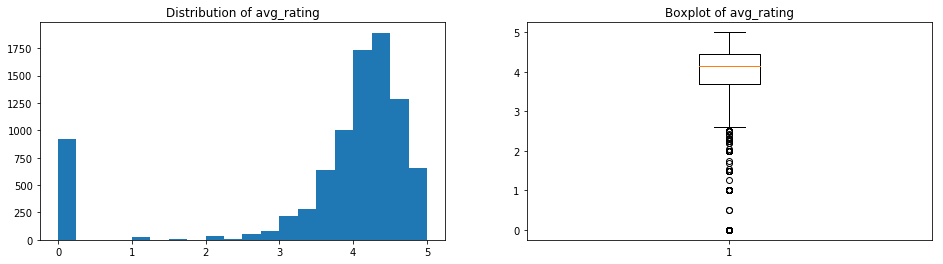

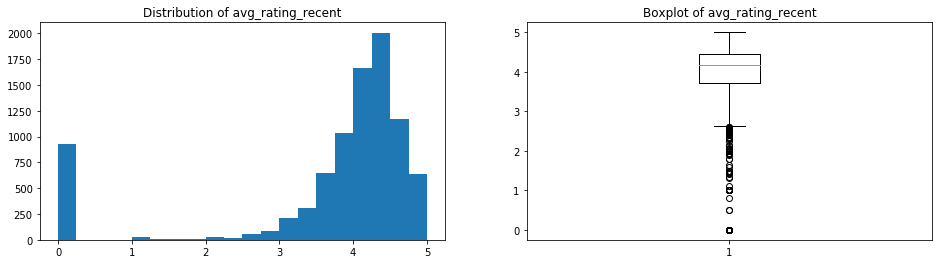

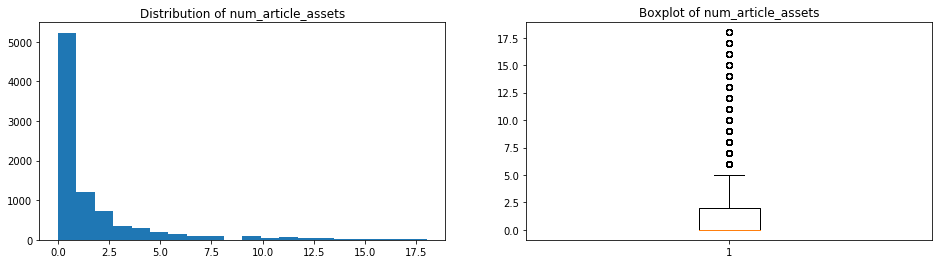

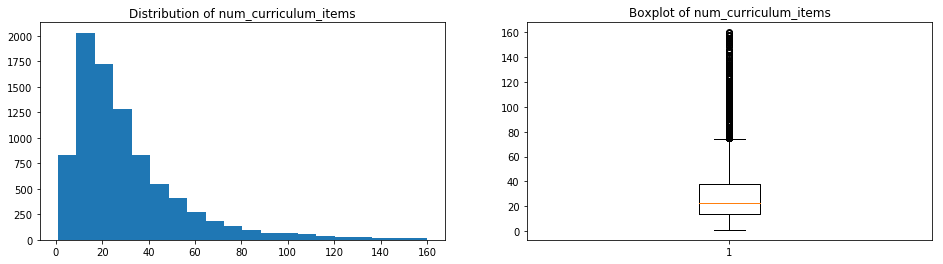

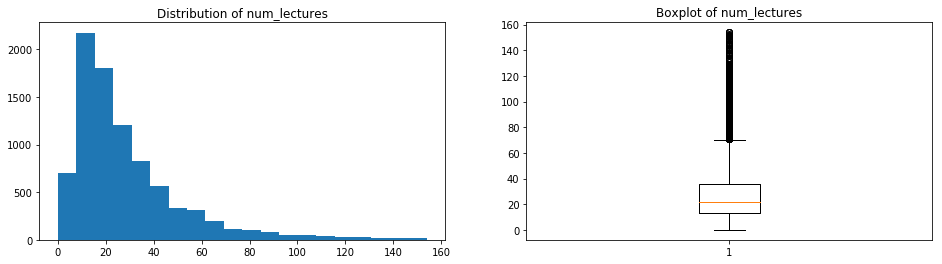

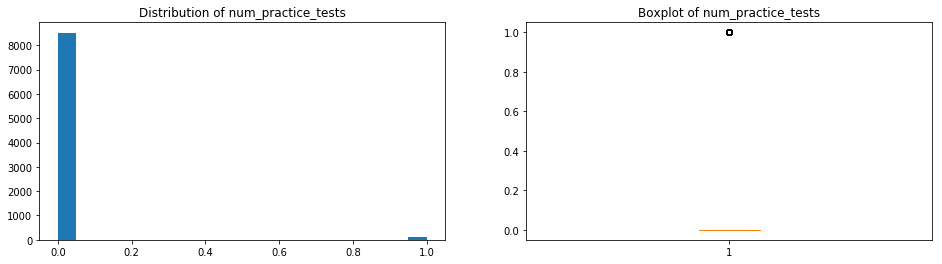

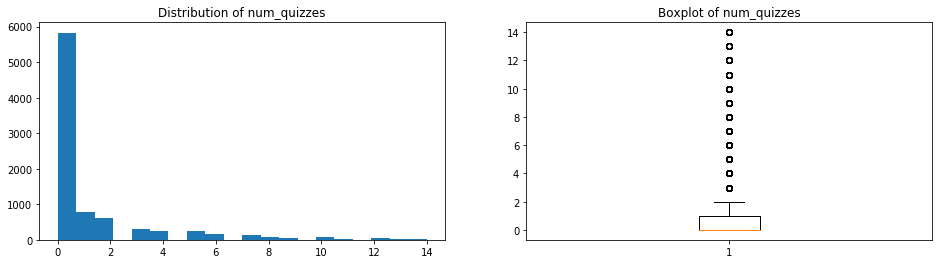

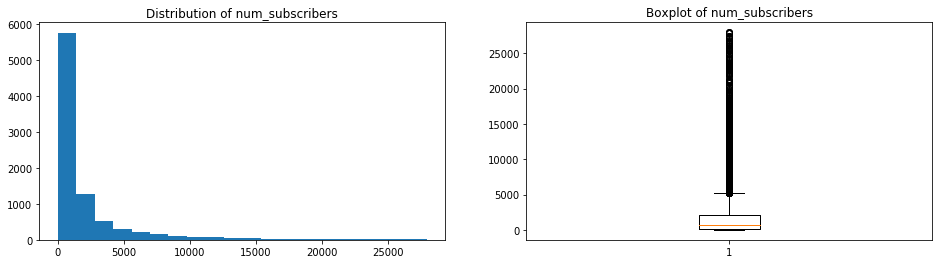

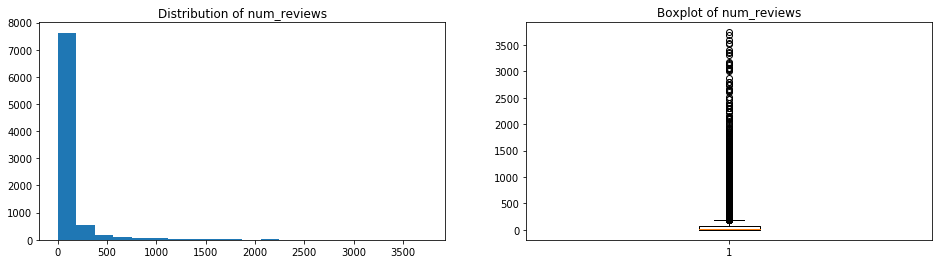

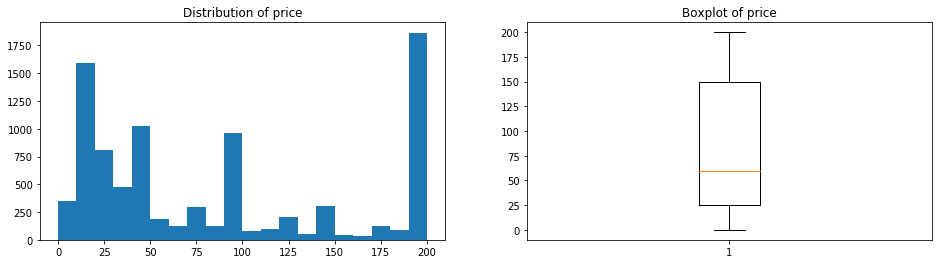

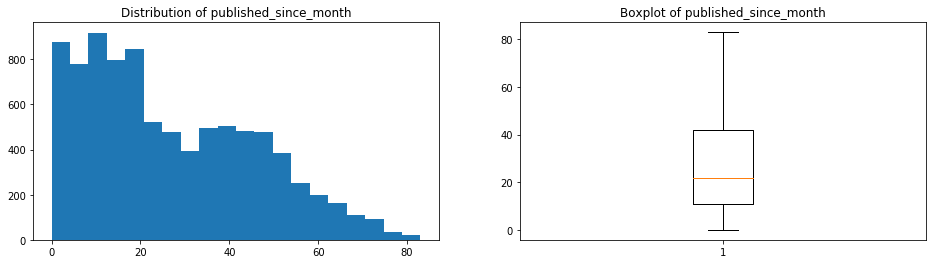

In [9]:
#There are some outliers in the dataset - I filtered out the data, where the value was smaller/larger then mean+-3*std
var_num=['avg_rating', 'avg_rating_recent','num_article_assets' , 'num_curriculum_items','num_lectures', 
         'num_practice_tests', 'num_quizzes','num_subscribers', 'num_reviews', 'price',  'published_since_month']
excluded_all=[]

for col in var_num:
    mean=df_courses[col].mean()
    std=df_courses[col].std()
    temp=df_courses[(df_courses[col]>mean-3*std) & (df_courses[col]<mean+3*std)]
    excluded_all.extend(list(set(df_courses.index)-set(temp.index)))
    fig, ax= plt.subplots(1,2,figsize=(16,4))
    ax[0].hist(temp[col], bins=20)
    ax[1].boxplot(temp[col])
    ax[0].set_title('Distribution of '+ str(col))
    ax[1].set_title('Boxplot of '+ str(col))
    print('Number of dropped values of attribute {} is {}.'.format(col, len(df_courses)-len(temp)))
excluded=set(excluded_all)

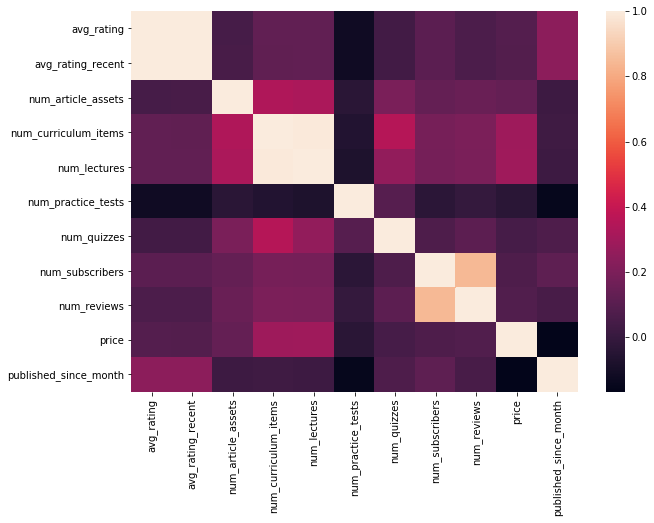

In [10]:
corr = df_courses[var_num].corr()
fig, ax=plt.subplots(figsize=(10,7))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

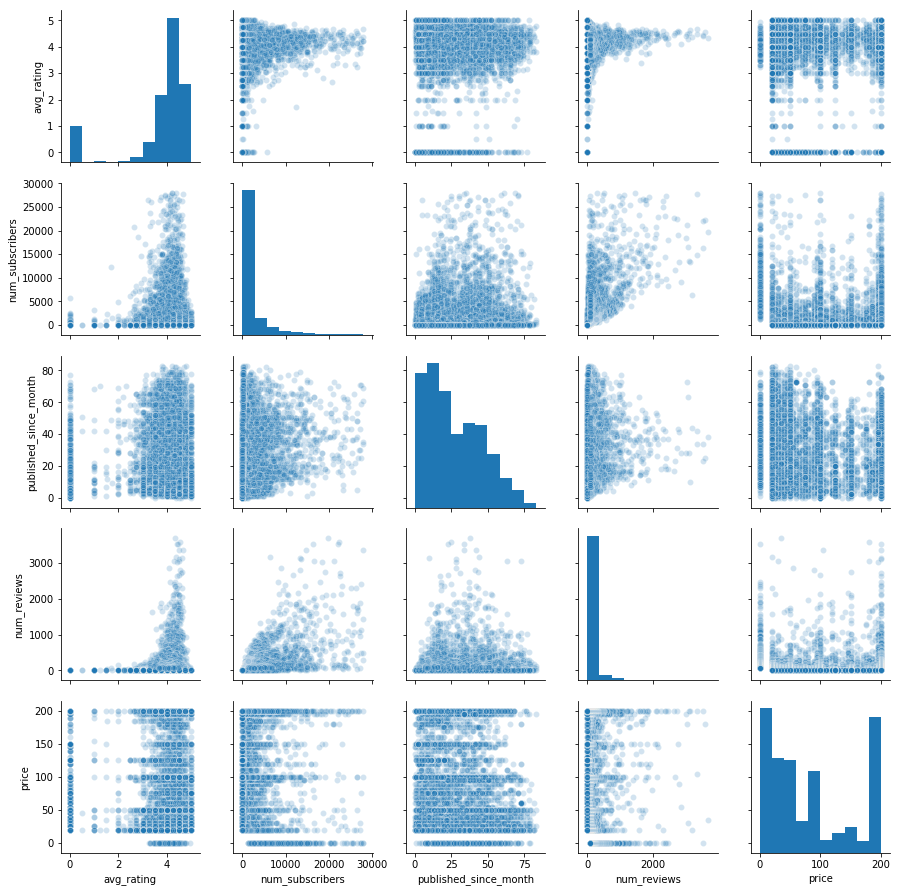

In [11]:
cols=['avg_rating','num_subscribers','published_since_month', 'num_reviews', 'price']
temp=df_courses[~df_courses.index.isin(excluded)]
sns.pairplot(temp[cols], plot_kws= {'alpha': 0.2})

The followings can be seen from the pairplot above:
- There is a positive correlation between the number of reviews/number of subscribers and the average rating - students normally give better ratings
- As expected, there is a positive correlation between number of subscribers and number of reviews
- There is also a positive correlation between published since and the average rating -> older courses have better ratings. This seems logic, since I would expect that courses which aren't popular won't stay long on the sortiment
- The price doesn't have an effect on the average ratings 

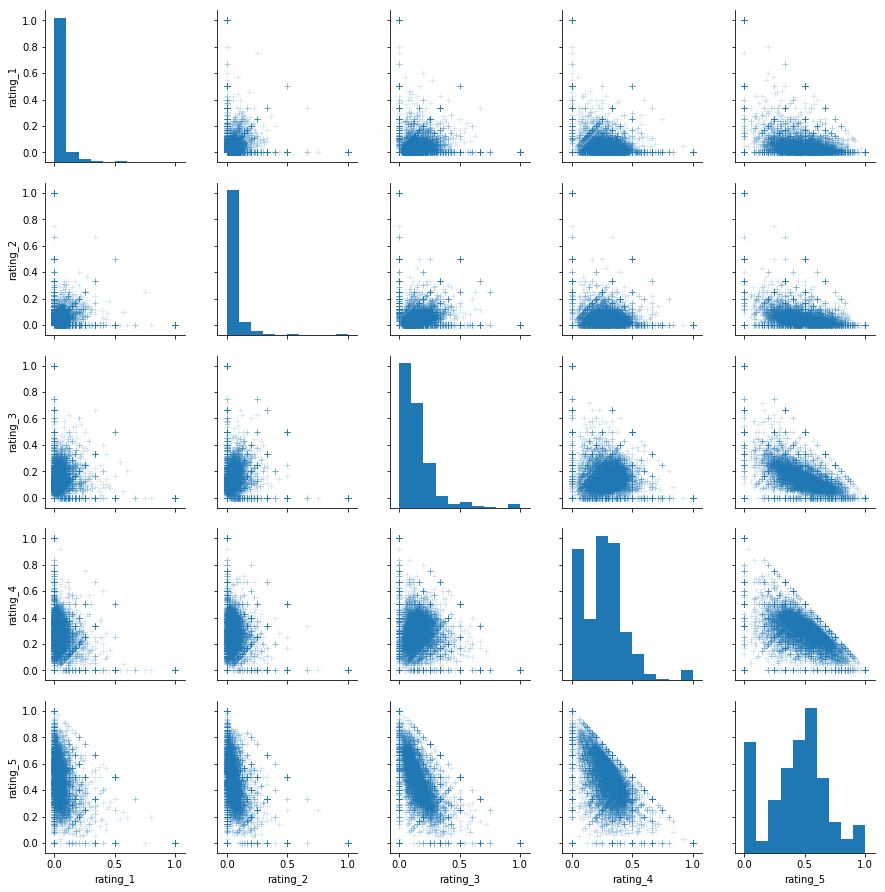

In [12]:
sns.pairplot(df_courses[['rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5']], markers="+",  plot_kws= {'alpha': 0.2})

### 3.1.2. Discrete variables

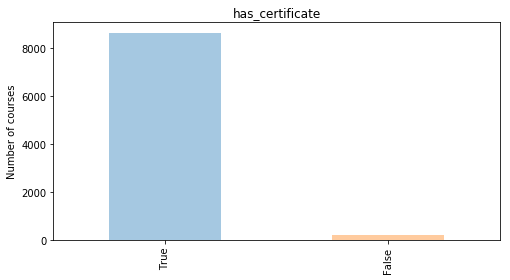

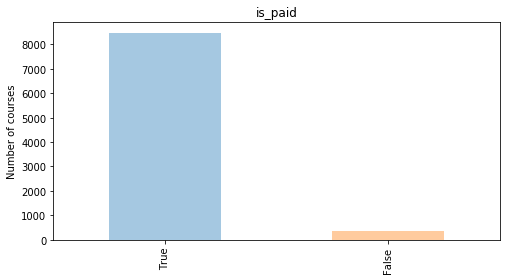

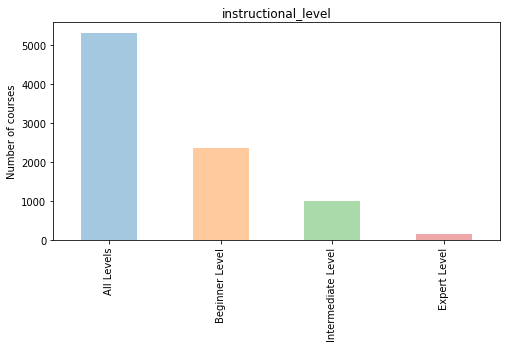

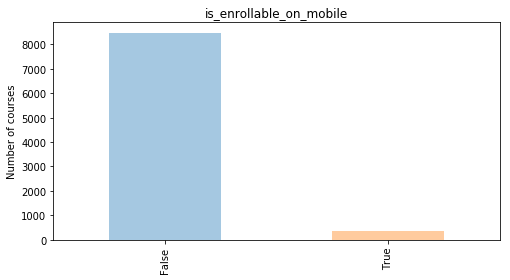

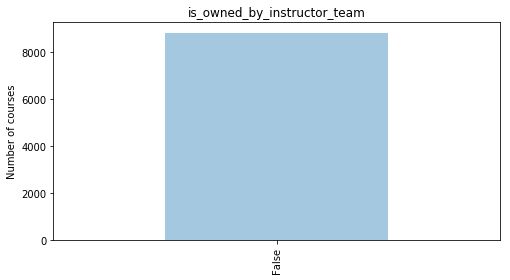

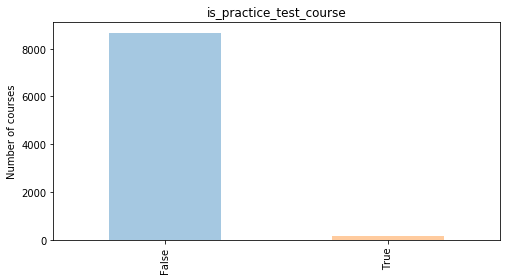

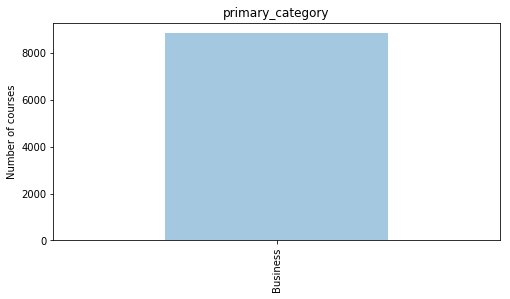

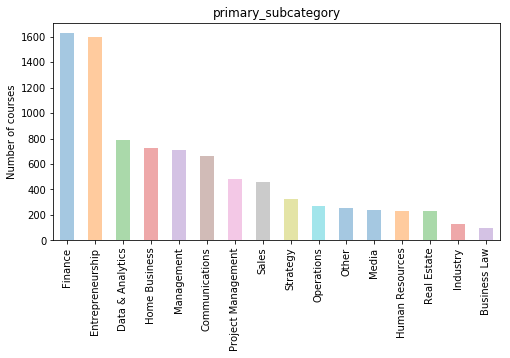

In [13]:
#barchart
var_char=['has_certificate', 'is_paid', 'instructional_level', 'is_enrollable_on_mobile','is_owned_by_instructor_team',
          'is_practice_test_course', 'primary_category', 'primary_subcategory' ]
for col in var_char:
    temp=df_courses[col].value_counts()
    x_labels=temp.index
    plt.figure(figsize=(8, 4))
    ax = temp.plot(kind='bar', alpha=0.4)
    ax.set_title(col)
    ax.set_ylabel('Number of courses')
    ax.set_xticklabels(x_labels)
  
    rects = ax.patches
    labels = list(temp.values/temp.values.sum()*100)
    labels=[str(round(l,0))+'%' for l in labels]
    #for rect, label in zip(rects, labels):
        #height = rect.get_height()
        #ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom')
plt.show()

In [14]:
#number of subscribers in the categories
df_courses['earnings']=df_courses['price']*df_courses['num_subscribers']
df_subcategories=df_courses.groupby('primary_subcategory').agg({'num_subscribers':'sum',
                                               'avg_rating': 'mean',
                                               'price': 'mean',
                                               'earnings': 'sum'})    
df_subcategories

price  avg_rating  num_subscribers      earnings
primary_subcategory                                                       
Business Law          74.313542    3.457672           129453  8.919835e+06
Communications        82.862617    3.890585          1847899  1.726297e+08
Data & Analytics     112.223181    3.684230          4199063  5.959344e+08
Entrepreneurship      86.693569    3.733111          4463452  4.619342e+08
Finance               91.475695    3.674495          3852128  3.652736e+08
Home Business         91.737290    3.795348          2584331  2.494725e+08
Human Resources       73.475195    3.570370           298815  2.063215e+07
Industry              75.943016    3.846861           148751  1.130610e+07
Management            77.310999    3.545673          1118899  9.852554e+07
Media                 75.325105    3.889977           560106  5.212026e+07
Operations            81.718162    3.659237           434207  3.925080e+07
Other                 76.250000    3.642113           338593  2.892829e+07
Project Management   104.459187    3.613914          1259726  1.410943e+08
Real Estate           93.806009    3.843020           323194  3.692189e+07
Sales                 94.502126    3.696291           862659  1.041078e+08
Strategy              86.423445    3.529985           734847  5.287222e+07

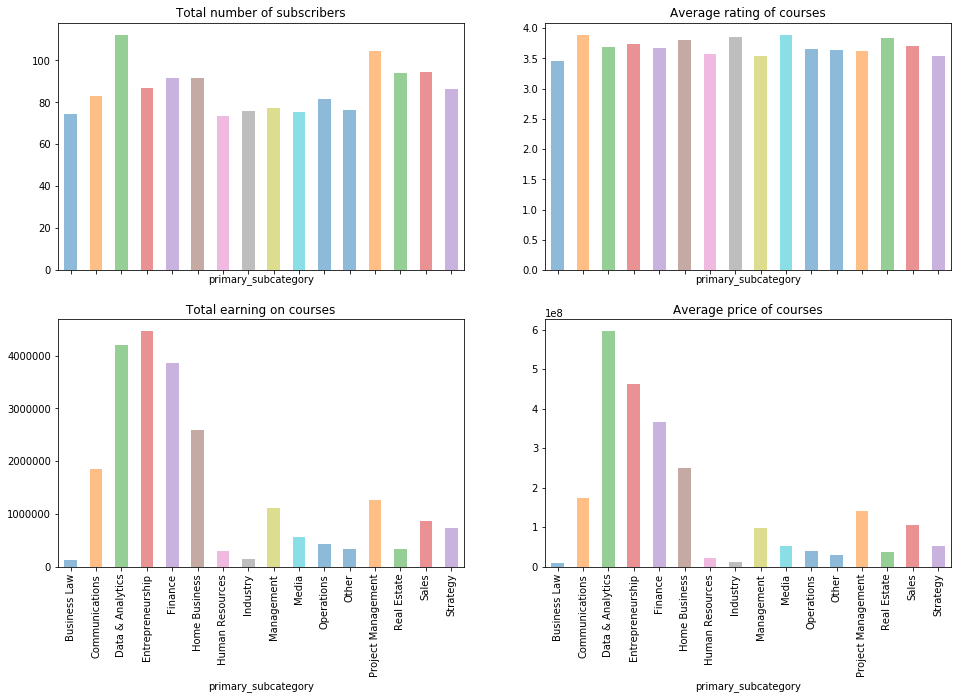

In [15]:
titles=['Total number of subscribers', 'Average rating of courses', 'Total earning on courses', 'Average price of courses']
fig, ax= plt.subplots(2,2,figsize=(16,10))
num=0
for i, col in enumerate(df_subcategories.columns):
    num+=1
    ax= plt.subplot(2,2, num)
    df_subcategories[col].plot(kind='bar', ax=ax, alpha=0.5)
    plt.title(titles[i])
    if num in range(3) :
        plt.tick_params(labelbottom='off')
plt.show()
    

- Two subcategories have an average price higher than 100 dollars : The subcategory Data & analytics with 112, and Project Management with 104
- The total earning on the courses is the highest in the subcategory for Data & Analytics and the second is in Entrepreneurship.
- The total number of subscribers are the highest in the category of Entrepreneurship and in Data & Analytics

### 3.1.3 Attribute Objectives

I analyzed the attribute objectives of the courses to get a better understanding about the courses. 
At first I needed to transform the list of objectives into one string, and then investigate the frequencies of each word.
I also implemented stemming: for that, I created a dataframe, where thee indexes are the stemmed words, and the values are the words which were stemmed. I needed it, to transform back the stemmed words. By means of the stemming similar words were counted as the same word (e.g. the words learn and learning are treated as one word). 

In [18]:
objectives_text=df_courses['objectives'].apply(udemy_functions.combine_list)
vocab_frame_orig=udemy_functions.vocab_stem(objectives_text)
vocab_frame_orig.head()

there are 572886 items in vocab_frame


words
master    master
machin   machine
learn   learning
on            on
python    python

In [19]:
#drop duplicates from the dataframe with stemmed words
vocab_frame=udemy_functions.drop_words(vocab_frame_orig)

there are 11957 items in vocab_frame


In [20]:
StopWords=set(stopwords.words('english')+list(punctuation)+["’", "n't", "'s", "--", "-", "...", "``", "''", "“", "039"])

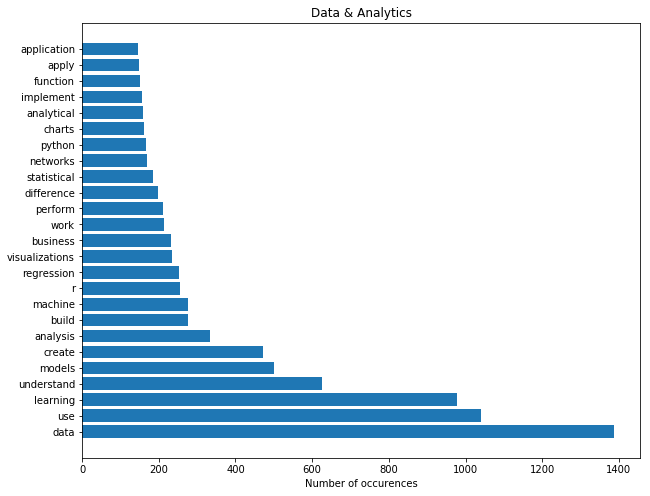

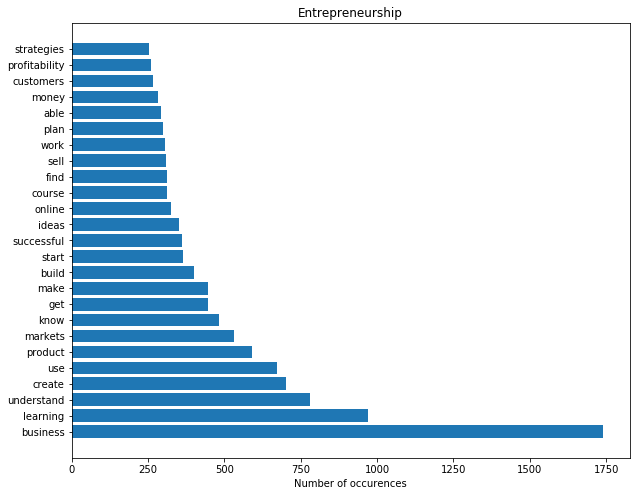

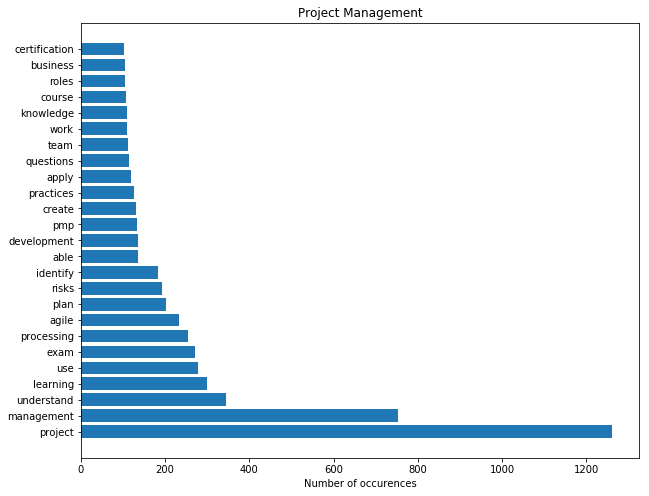

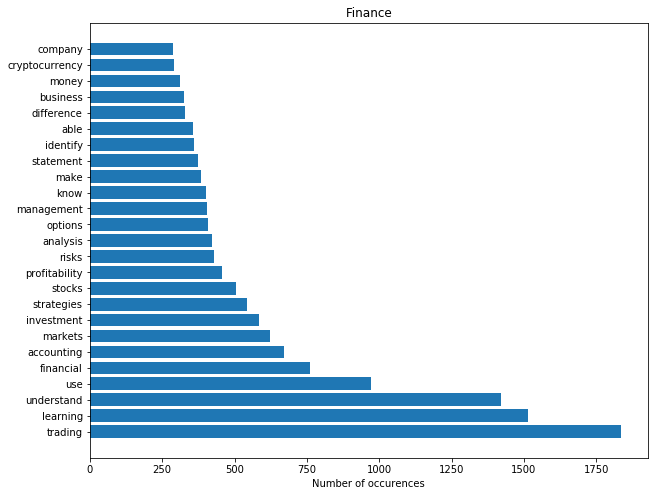

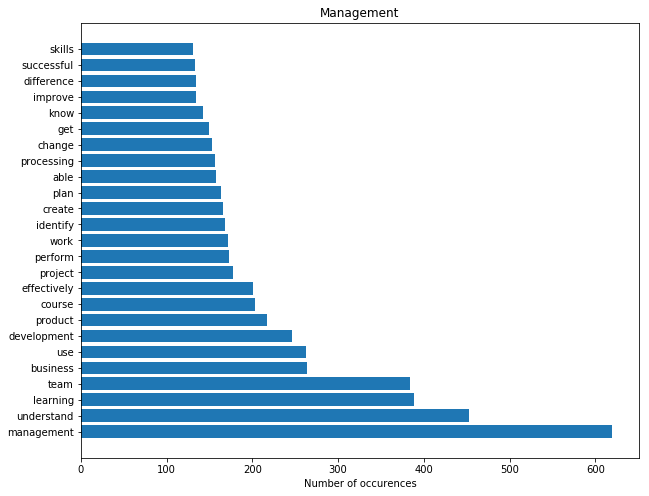

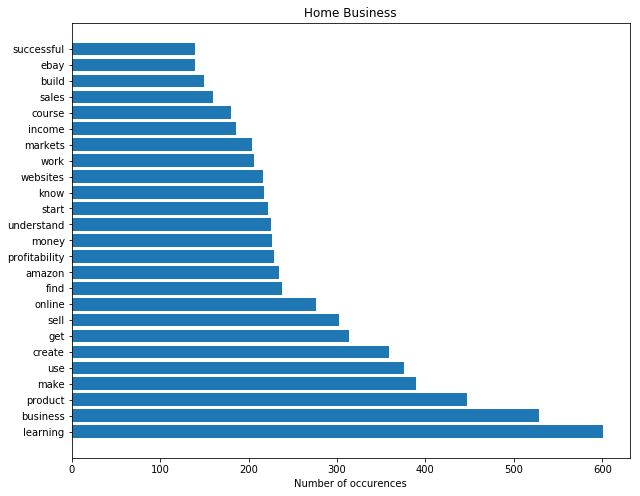

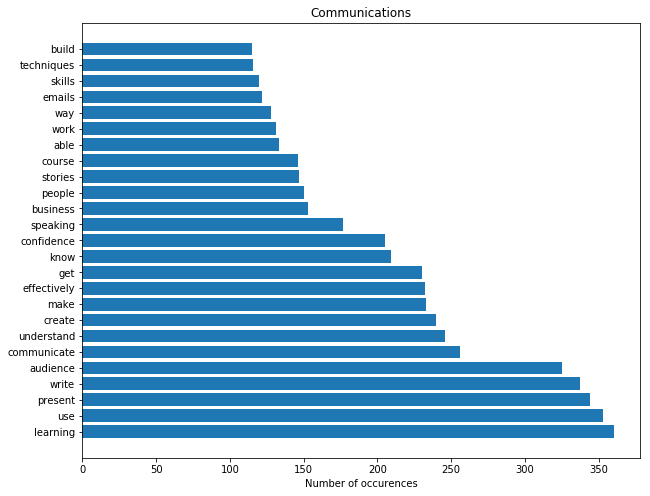

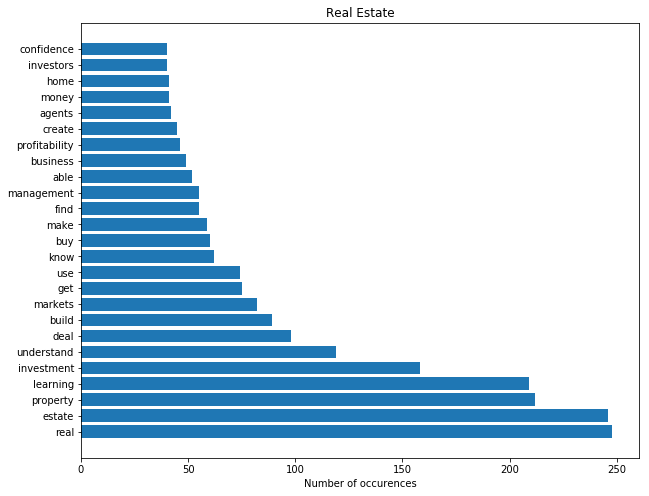

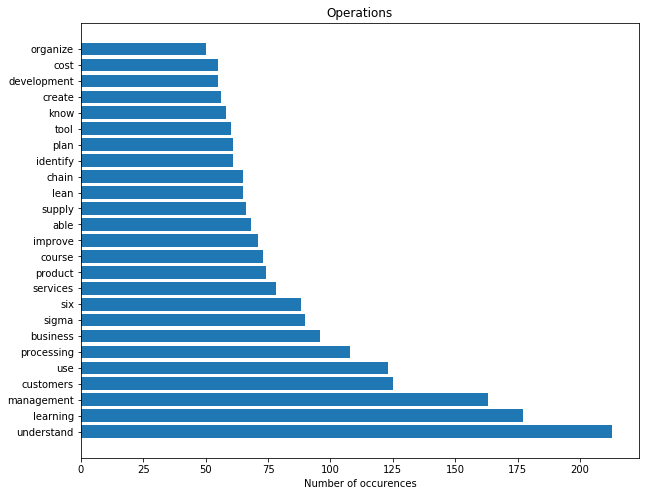

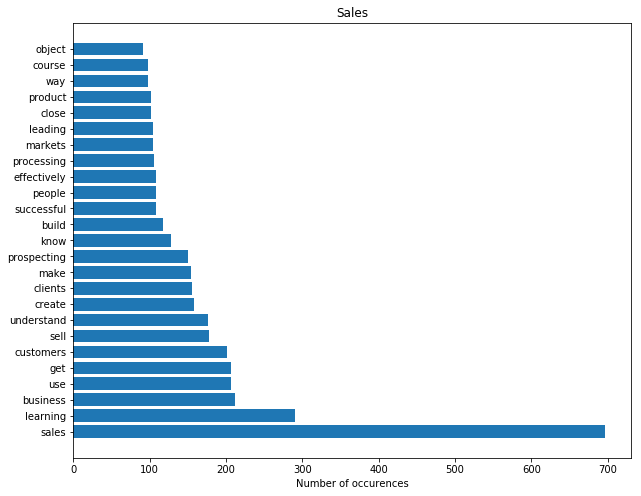

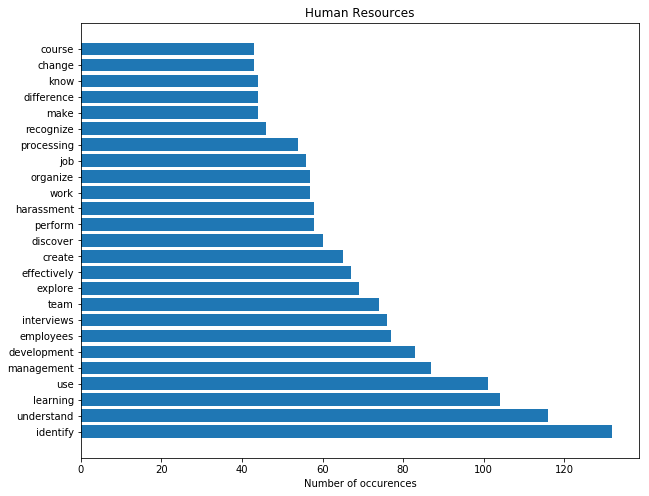

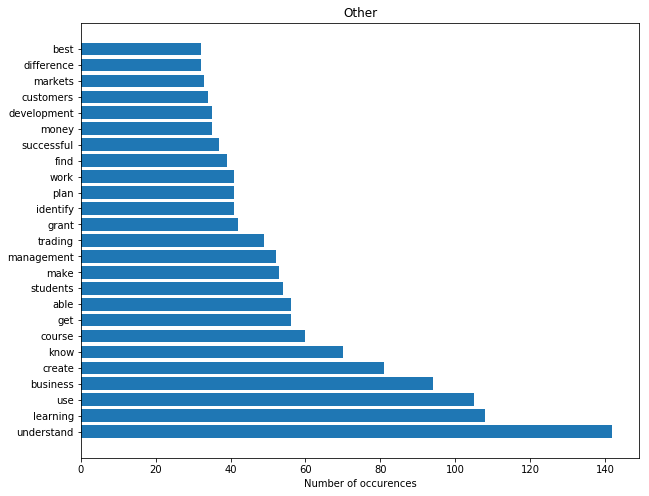

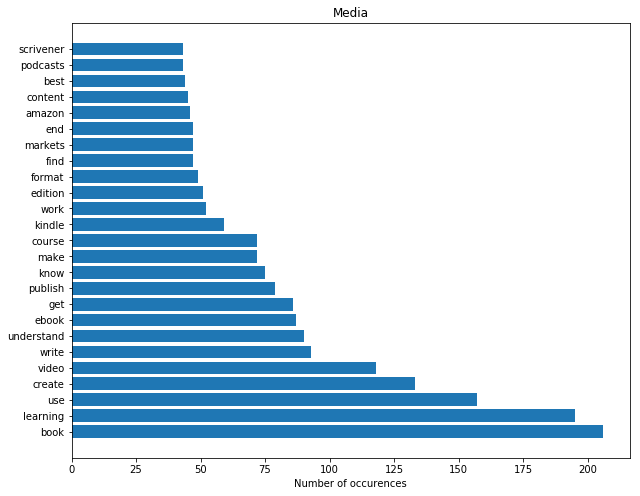

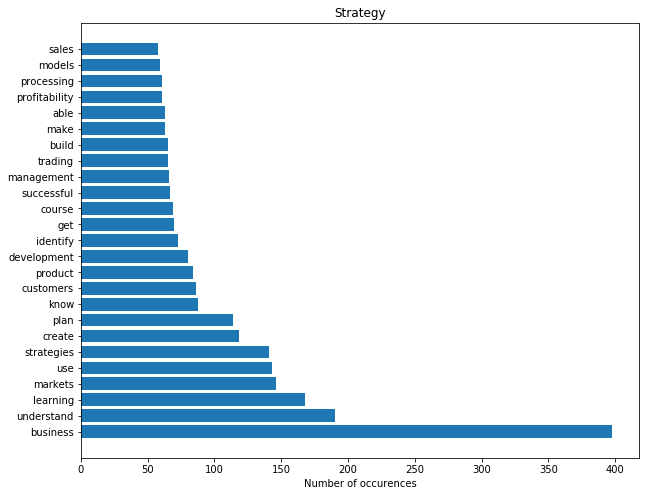

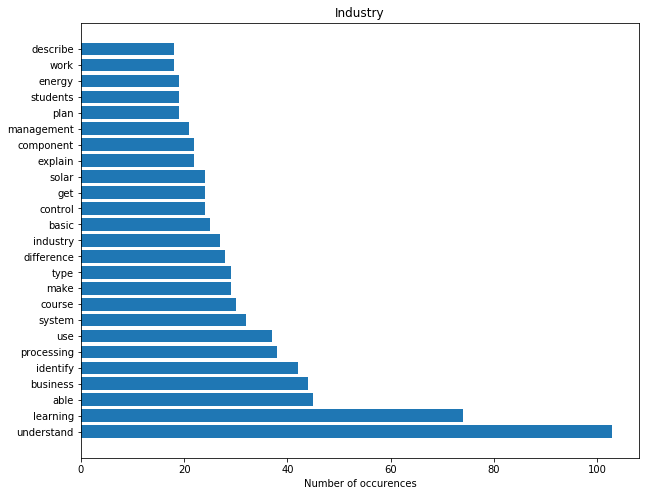

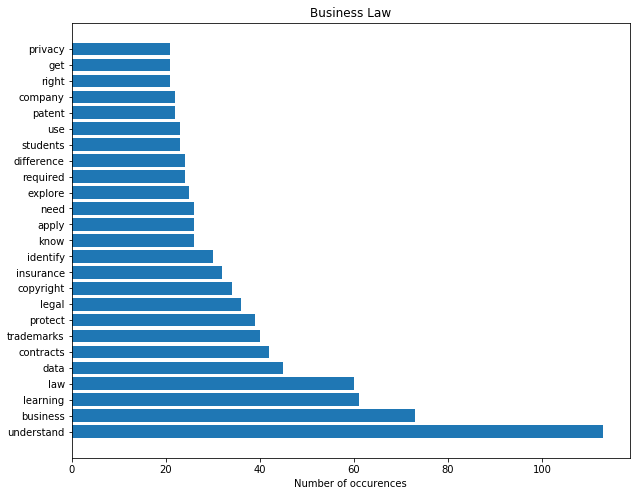

In [21]:
udemy_functions.top_words_graph(df_courses, 'objectives', True, 'bar', StopWords, vocab_frame)

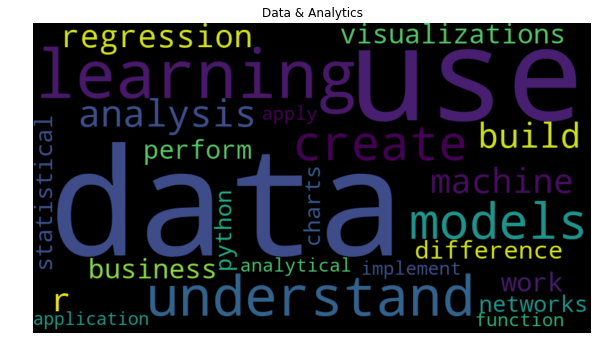

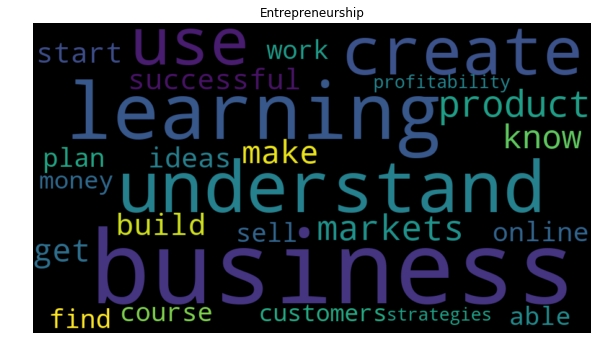

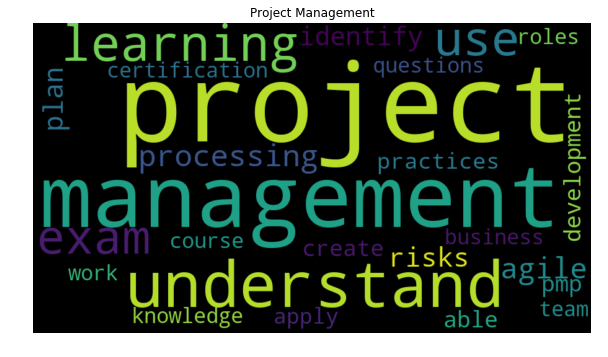

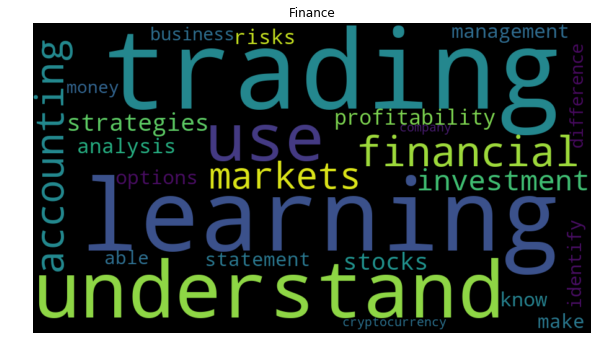

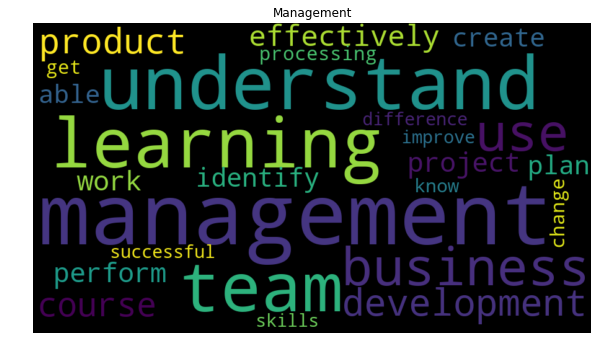

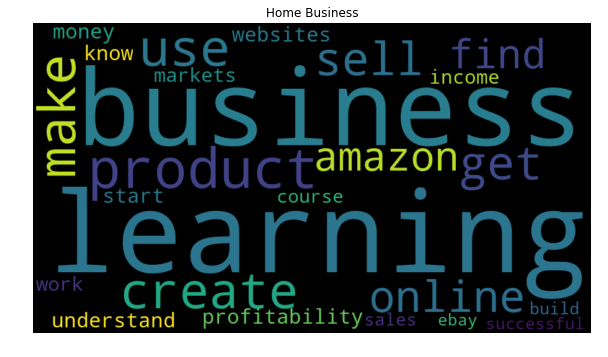

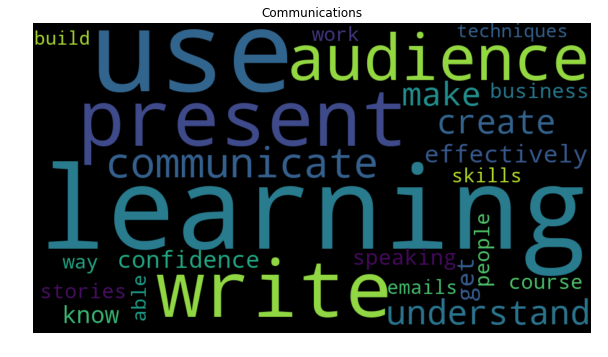

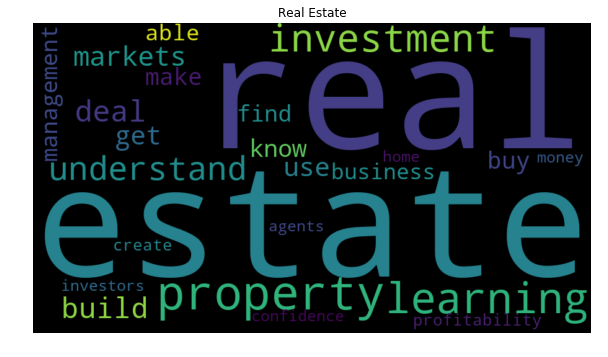

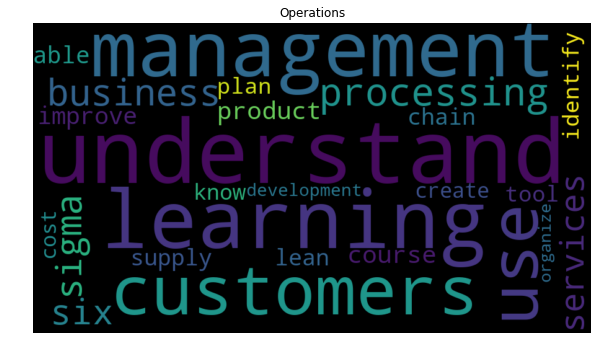

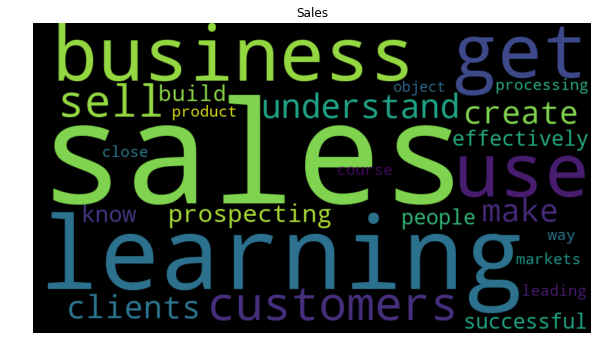

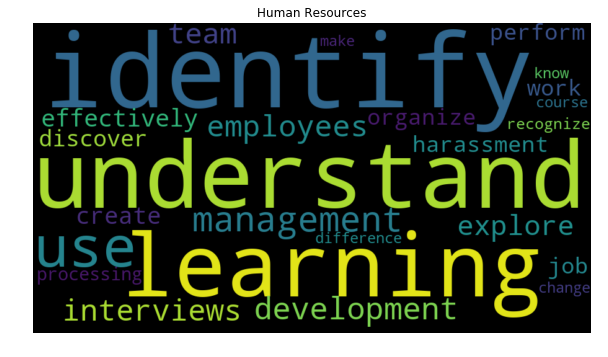

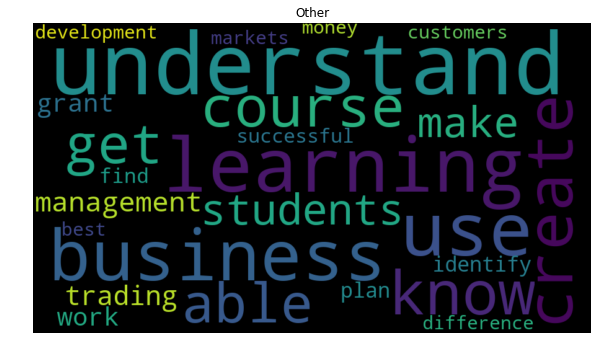

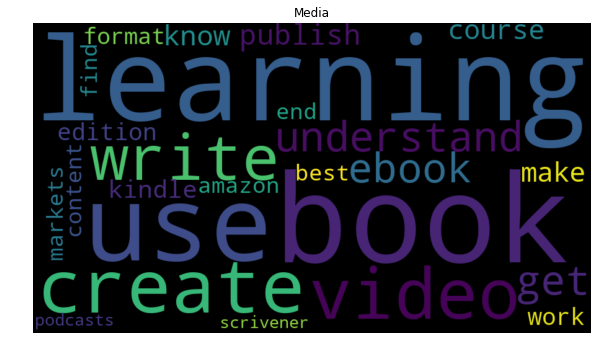

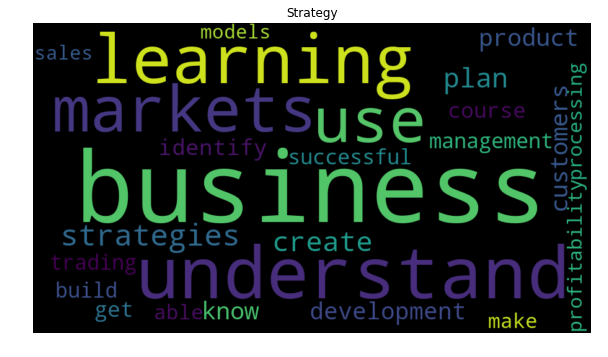

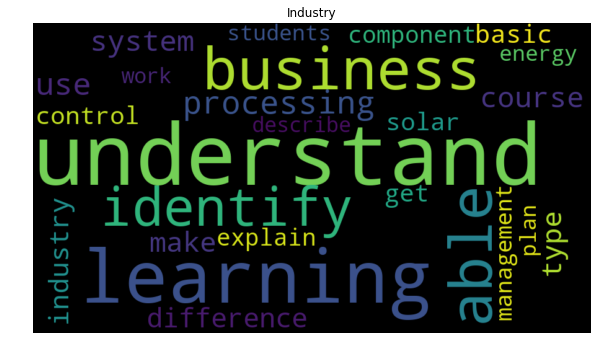

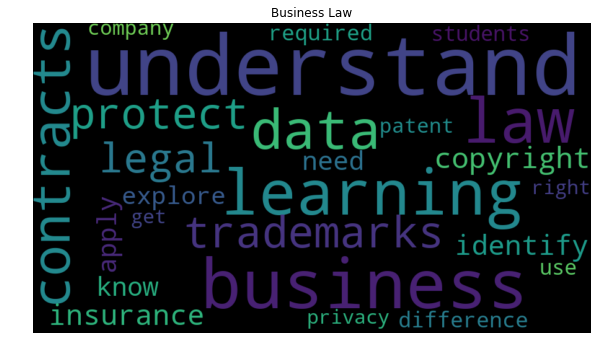

In [22]:
udemy_functions.top_words_graph(df_courses, 'objectives', True, 'wordcloud', StopWords, vocab_frame)

### 3.1.4. Attribute Description

In [23]:
vocab_frame_descr=udemy_functions.vocab_stem(df_courses['description_text'])
vocab_frame_descr.head()

there are 3321233 items in vocab_frame


words
interest  interested
in                in
the              the
field          field
of                of

In [24]:
vocab_frame_descr=udemy_functions.drop_words(vocab_frame_descr)

there are 66371 items in vocab_frame


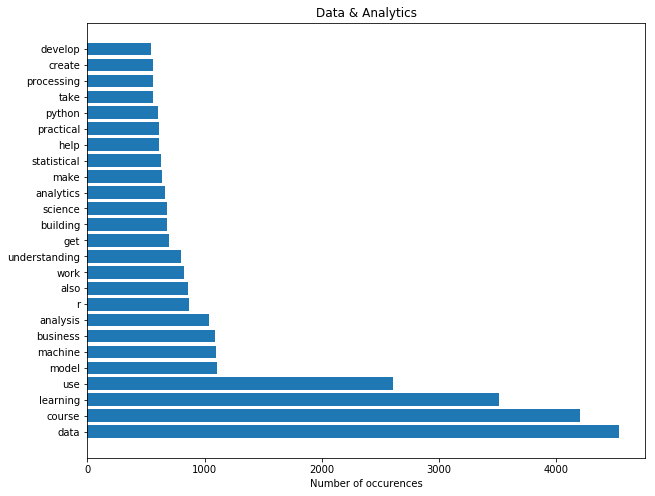

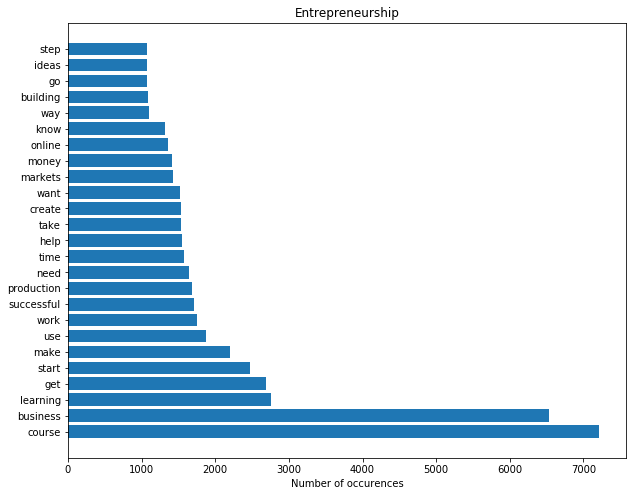

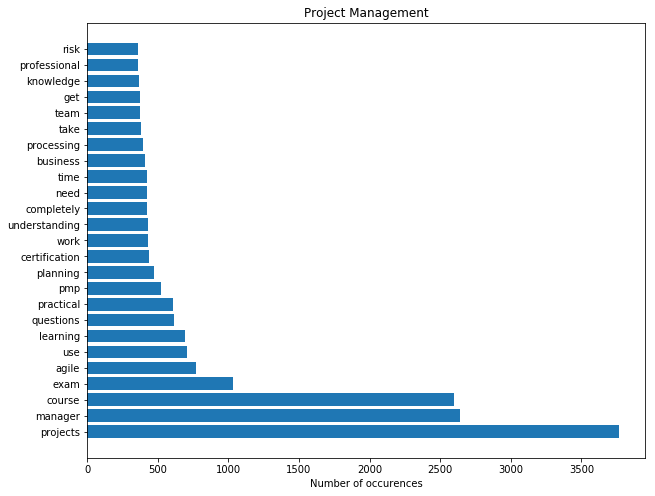

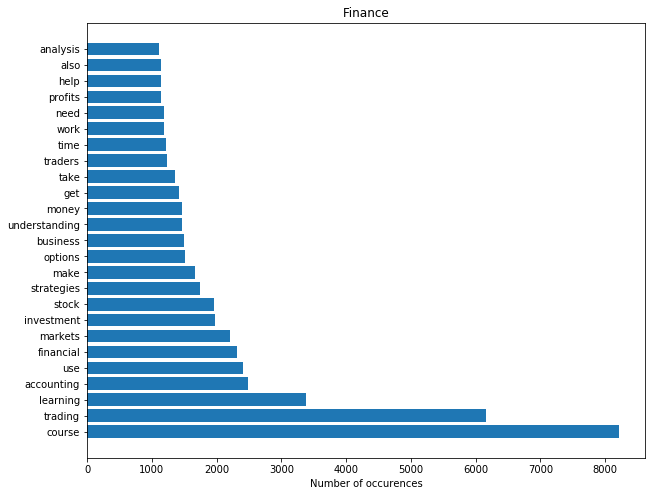

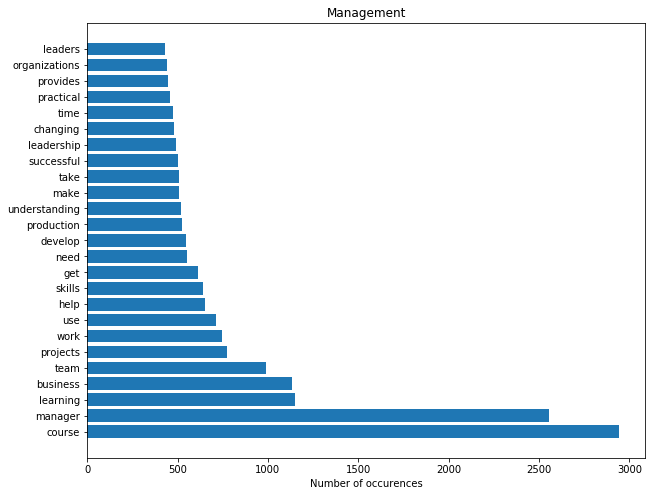

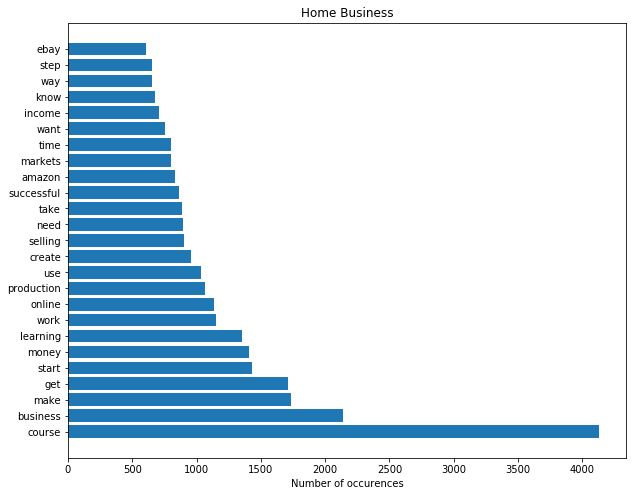

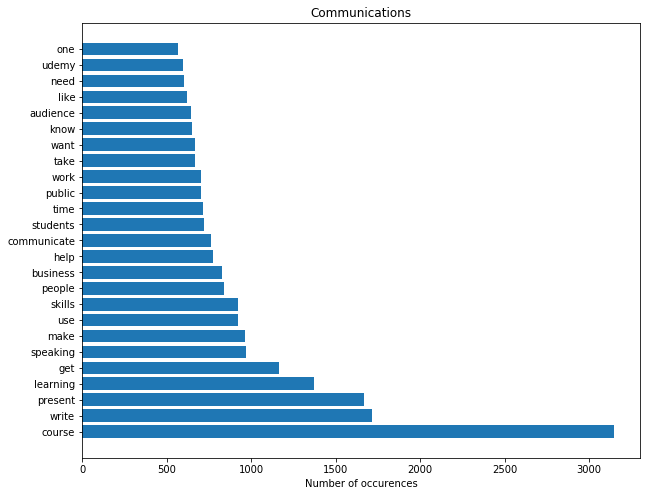

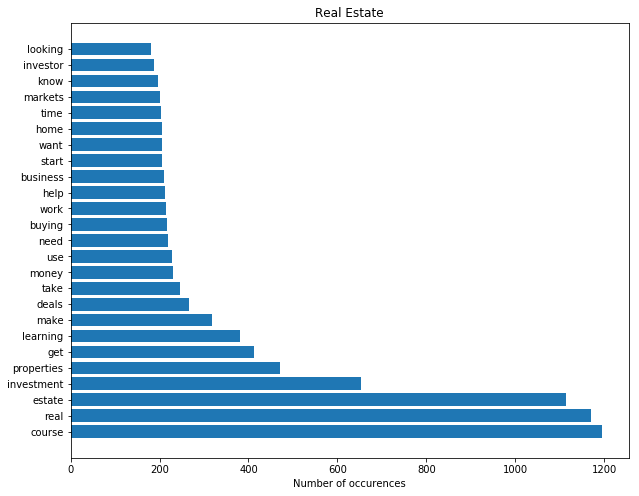

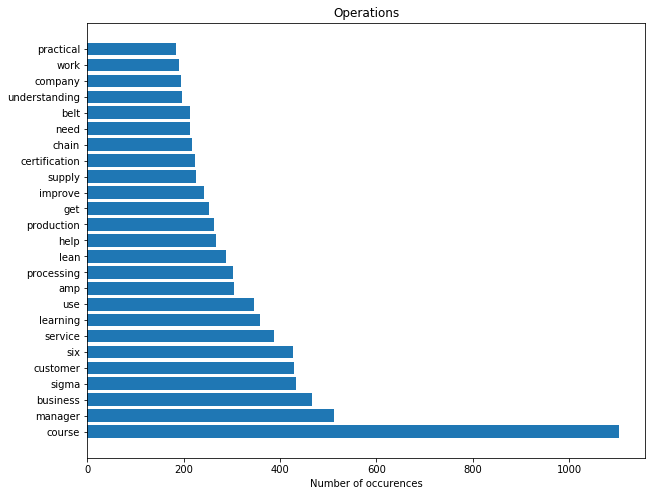

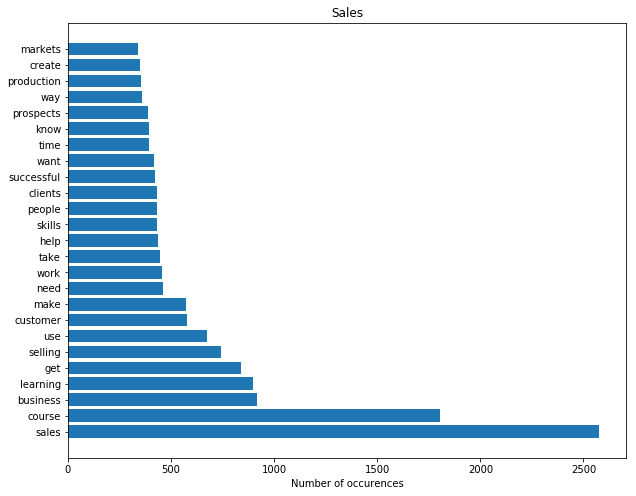

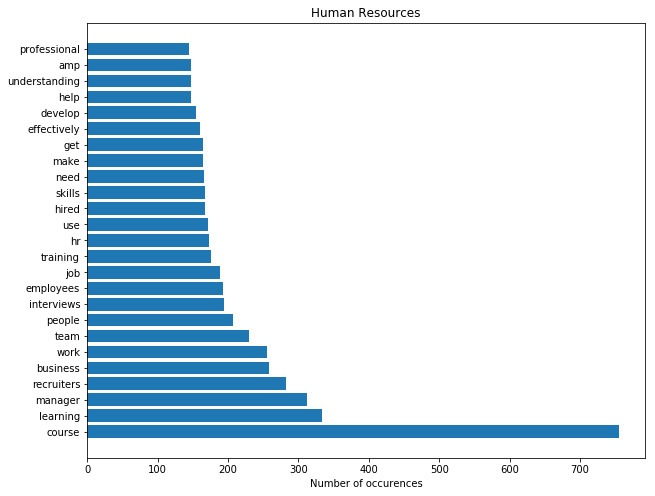

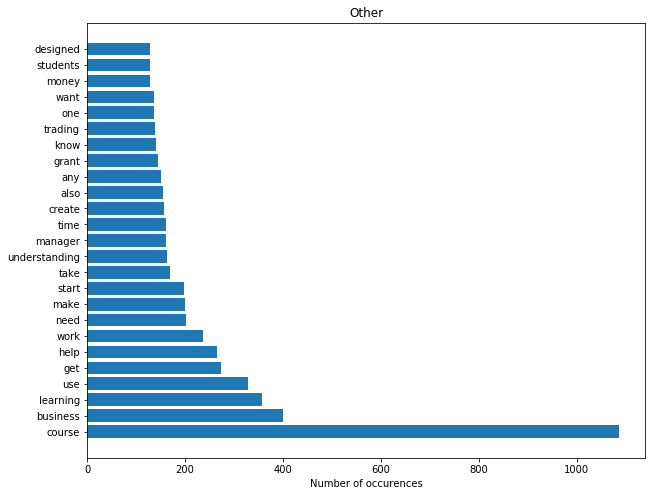

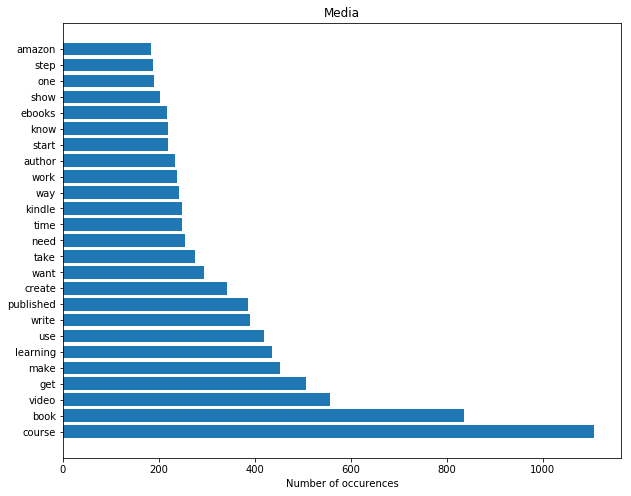

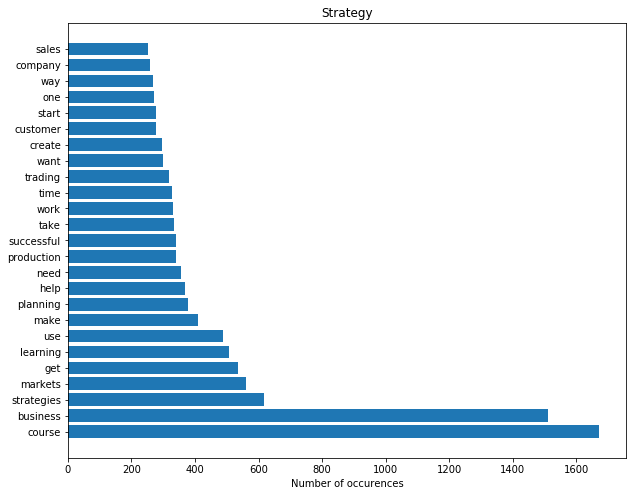

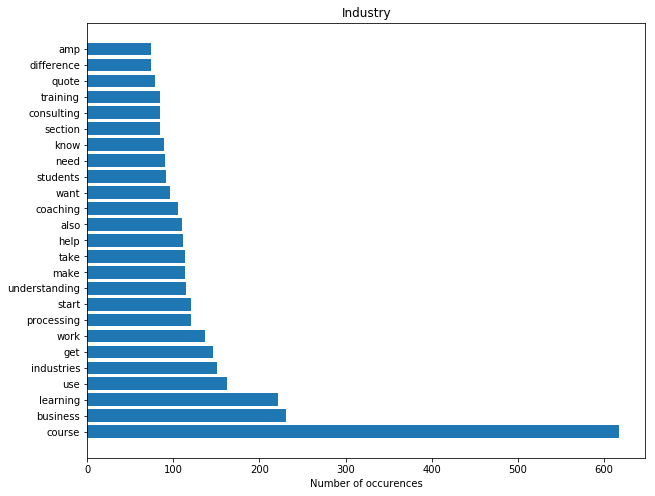

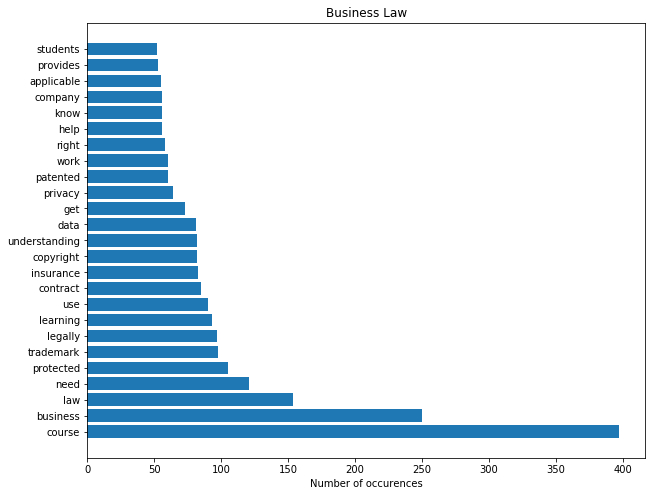

In [25]:
udemy_functions.top_words_graph(df_courses, 'description_text', False, 'bar', StopWords, vocab_frame_descr)

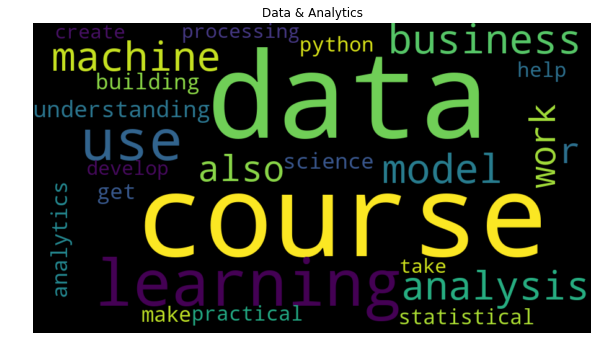

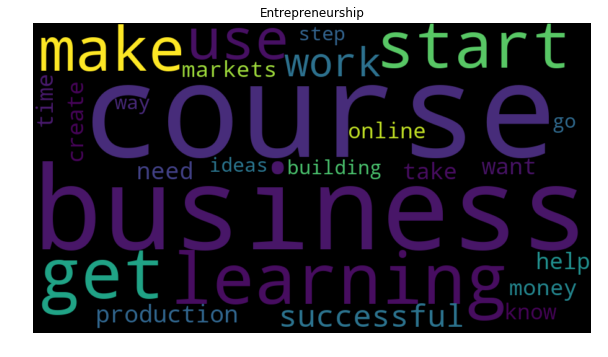

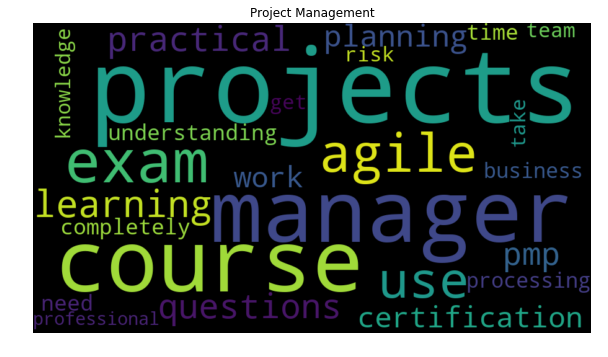

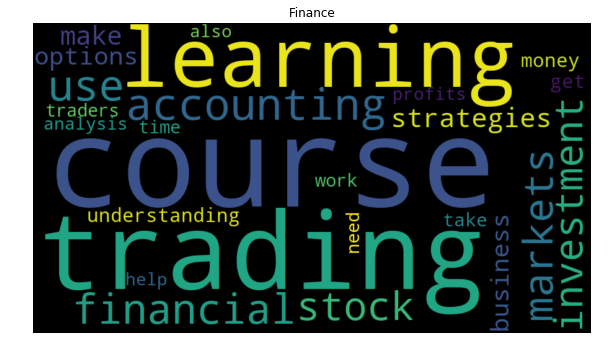

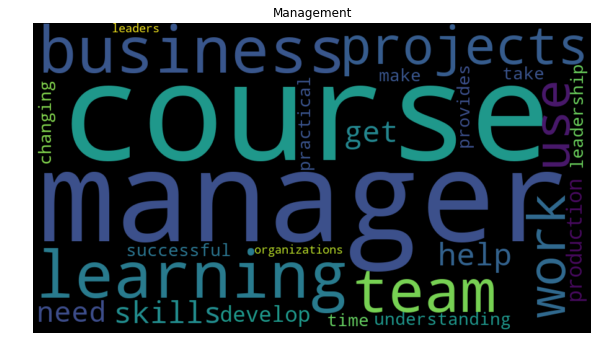

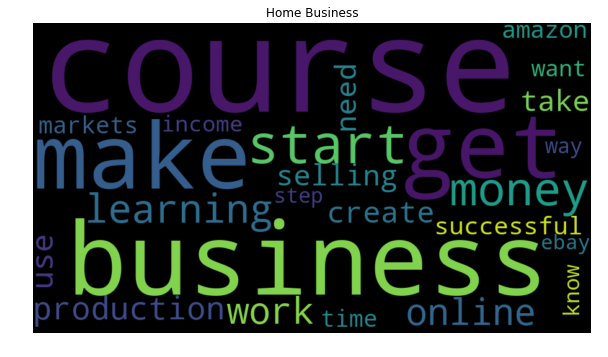

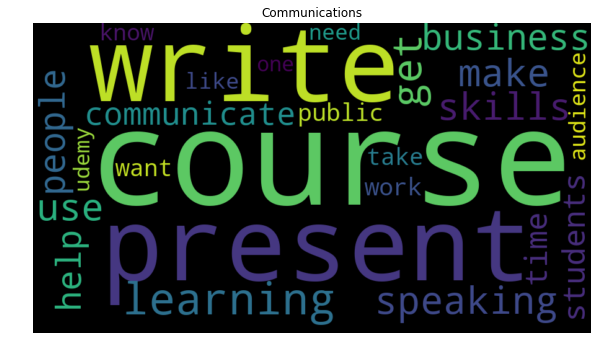

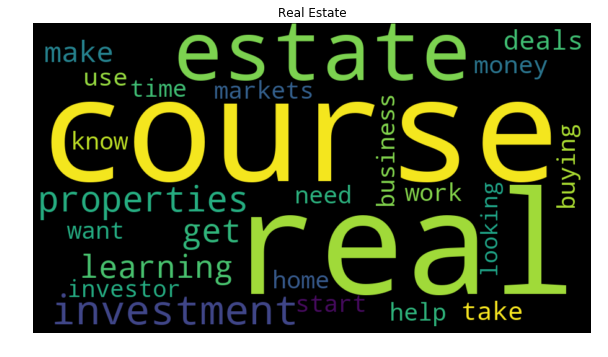

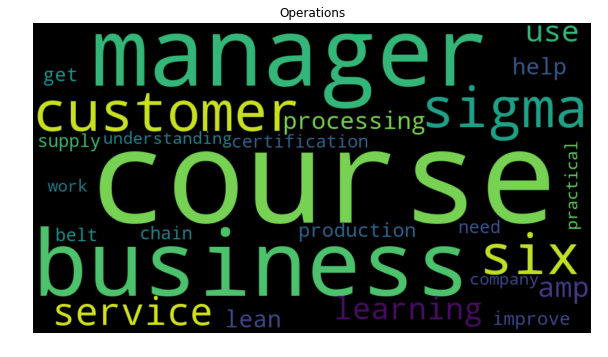

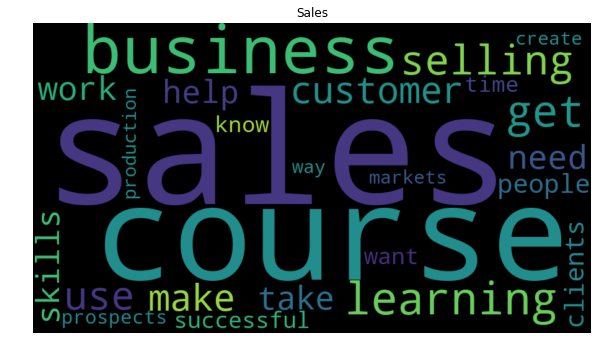

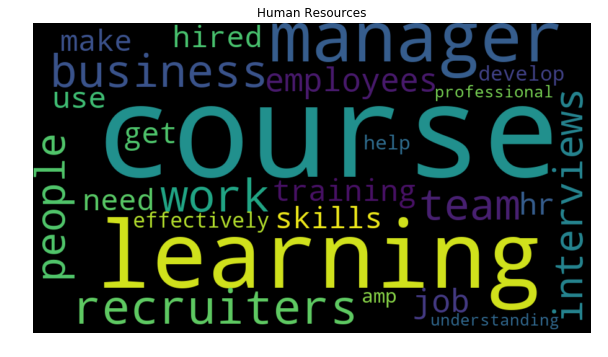

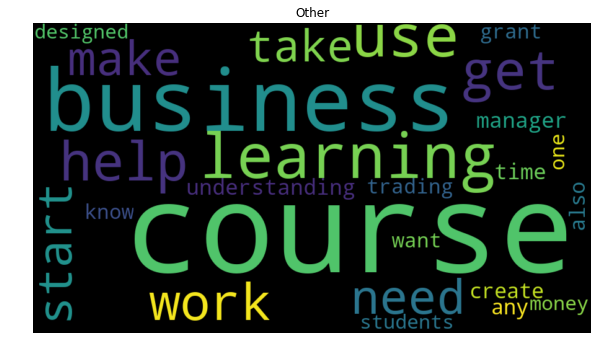

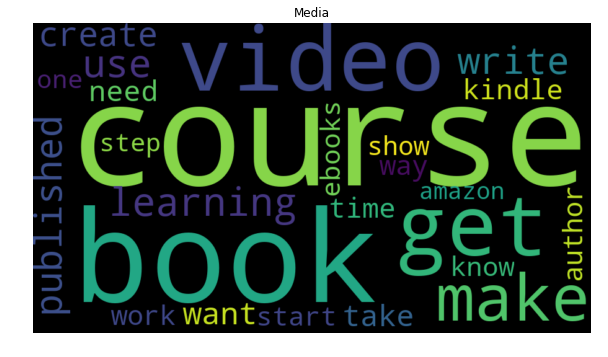

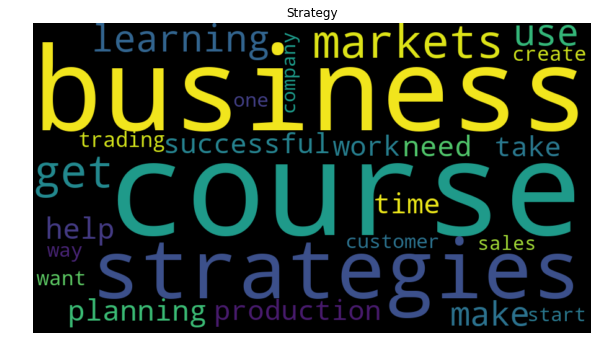

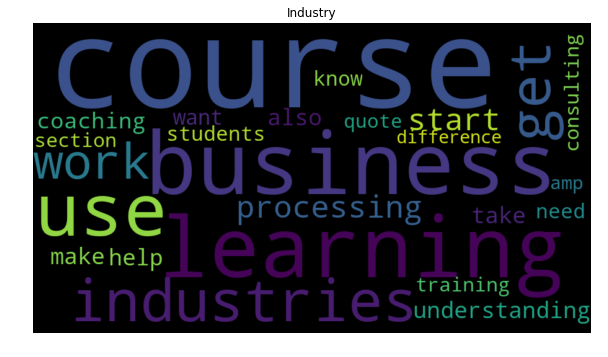

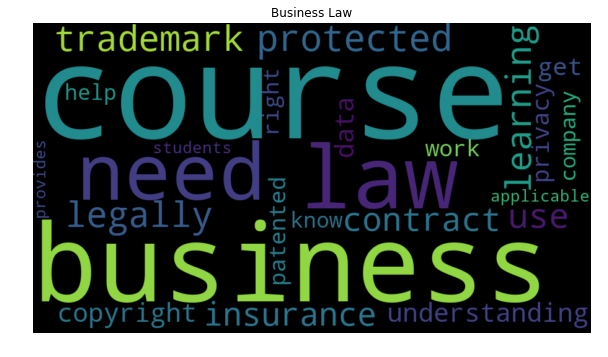

In [26]:
udemy_functions.top_words_graph(df_courses, 'description_text', False, 'wordcloud', StopWords, vocab_frame_descr)

## 3.2. EDA of the reviews dataset

In [32]:
df_reviews=pd.read_csv('data/cleaned/df_reviews.csv', index_col=0)
df_reviews.head()

course_id               created  rating                   user_name
0     950390  2019-02-23T23:23:12Z     4.5                     Vikas K
1     950390  2019-02-23T22:52:43Z     4.5                  Alicia Kyo
2     950390  2019-02-23T22:52:13Z     2.5              Godfred Narkwa
3     950390  2019-02-23T22:43:44Z     5.0        Moustaine Adegbindin
4     950390  2019-02-23T22:27:37Z     5.0  Krutika Chandrashekhar Pai

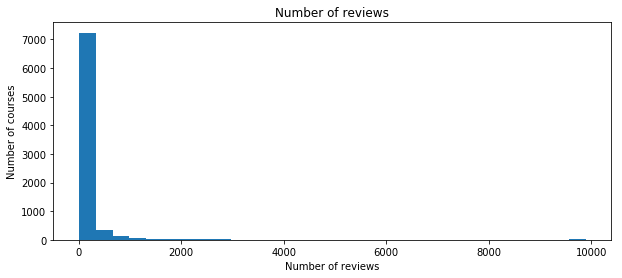

In [28]:
# Number of reviews per course: most courses have very few reviews
# The limit of the available reviews from the API is 10.000 -> that's why there are couple courses around 10.000 
nr_reviews=df_reviews['course_id'].value_counts()
ax, fig= plt.subplots(figsize=(10,4))
plt.hist(nr_reviews, bins=30)
plt.xlabel('Number of reviews')
plt.ylabel('Number of courses')
plt.title('Number of reviews')
plt.show()

In [34]:
nr_reviews.describe()

count    7958.000000
mean      174.816914
std       707.430030
min         1.000000
25%         8.000000
50%        25.000000
75%        89.000000
max      9896.000000
Name: course_id, dtype: float64

In [29]:
#Number of reviews per user_name (User_name is not unique!)
nr_user=df_reviews['user_name'].value_counts()
unique, counts = np.unique(nr_user, return_counts=True)
#dict(zip(unique, counts))

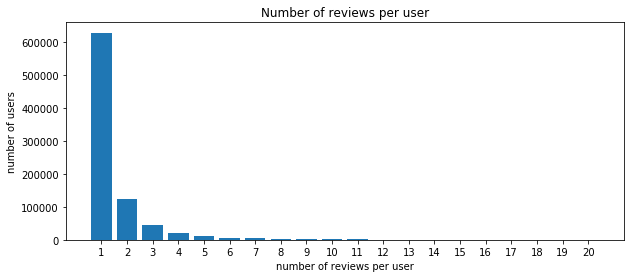

In [30]:
#plot the first 20 value of the most common number of reviews per user
#most users (more than 600000) have only 1 review
ax, fig= plt.subplots(figsize=(10,4))

plt.bar(np.arange(len(counts[:20])), counts[:20], align='center')
plt.xticks(np.arange(len(counts[:20])), unique[:20])
plt.xlabel('number of reviews per user')
plt.ylabel('number of users')
plt.title('Number of reviews per user')
plt.show()

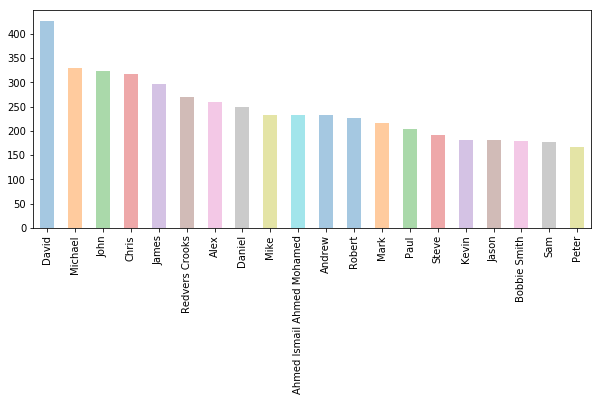

In [31]:
#plot the usernames with the most reviews (Username is not unique)
ax, fig= plt.subplots(figsize=(10,4))
nr_user[:20].plot(kind='bar', alpha=0.4)